# Horizon Europe Funding Analysis - Group 22

# 0. Setup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import numpy as np

# 1. Data Loading
- Load CORDIS datasets
- Explore initial data

In [50]:
projects = pd.read_csv(
    'Data/project.csv',
    encoding='utf-8',
    sep=';',                # Ensure the separator is a comma
    quotechar='"',          # Handle quoted fields correctly
    on_bad_lines='skip',    # Skip malformed lines instead of crashing
    engine='python'         # Use the Python engine (more forgiving than C)
    )

In [51]:
organizations = pd.read_csv('Data/organization.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')
deliverables = pd.read_csv('Data/projectDeliverables.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')
publications = pd.read_csv('Data/projectPublications.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')
reports = pd.read_csv('Data/reportSummaries.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')
euroscivoc = pd.read_csv('Data/euroSciVoc.csv', encoding='utf-8', sep=';', quotechar='"', on_bad_lines='skip', engine='python')

In [52]:
projects

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,ecSignatureDate,frameworkProgramme,masterCall,subCall,fundingScheme,nature,objective,contentUpdateDate,rcn,grantDoi
0,101116741,DOE,SIGNED,Digitizing Other Economies: A Comparative Appr...,2024-02-01,2029-01-31,1499998,1499998,HORIZON.1.1,ERC-2023-STG,2023-12-15,HORIZON,ERC-2023-STG,ERC-2023-STG,HORIZON-ERC,NaN,"How do longstanding, primarily non-industrial,...",2023-12-26 14:40:12,259247,10.3030/101116741
1,101163161,IRASTRO,SIGNED,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,2025-08-01,2031-07-31,12085363,12085363,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The James Webb Space Telescope (JWST) has ushe...,2025-02-24 17:23:14,268970,10.3030/101163161
2,101160499,In-phase,SIGNED,Multiscale modelling of aberrant phase transit...,2025-06-01,2030-05-31,1489128,1489128,HORIZON.1.1,ERC-2024-STG,2025-02-19,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,The spatiotemporal organization of the cell ma...,2025-02-24 17:23:11,268969,10.3030/101160499
3,101166905,mw-atlas,SIGNED,The first comprehensive Atlas of the Milky Way,2025-05-01,2031-04-30,9957560,9957560,HORIZON.1.1,ERC-2024-SyG,2025-02-20,HORIZON,ERC-2024-SyG,ERC-2024-SyG,HORIZON-ERC-SYG,NaN,The Milky Way is the cosmic environment in whi...,2025-02-24 17:23:01,268971,10.3030/101166905
4,101162875,MAtCHLESS,SIGNED,Untapping multiparametric 2D luminescence sens...,2025-03-01,2030-02-28,1500000,1500000,HORIZON.1.1,ERC-2024-STG,2025-02-18,HORIZON,ERC-2024-STG,ERC-2024-STG,HORIZON-ERC,NaN,Cellular organisms are complex machines whose ...,2025-02-24 17:23:12,268966,10.3030/101162875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,101114220,ModelMe,CLOSED,Deployment of ModelMe Innovation,2023-07-01,2024-01-31,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-06-01,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,The primary objective of the work performed wi...,2023-08-29 02:07:50,251278,10.3030/101114220
14739,101114193,Cogo,SIGNED,Cogo - all ride in one app. Cogo gathers elect...,2023-07-01,2024-06-30,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-06-19,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,Bibi Blomqvist co-founder and COO of Cogo ApS....,2023-06-28 17:04:41,251243,10.3030/101114193
14740,101114191,HORIZER,CLOSED,HORIZER,2023-07-01,2024-03-31,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-06-05,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,"In Women TechEU, HORIZER aims, over the next 9...",2023-07-25 09:52:28,254814,10.3030/101114191
14741,101114035,iComplai,CLOSED,AI-powered early warning and surveillance syst...,2023-07-01,2024-03-31,0,75000,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02-02,2023-06-01,HORIZON,HORIZON-EIE-2022-SCALEUP-02,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,NaN,A product recall is the process of retrieving ...,2023-06-28 17:02:39,251210,10.3030/101114035


In [53]:
organizations

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
0,101116741,DOE,999981634,NL811383696B01,WAGENINGEN UNIVERSITY,WU,False,HES,DROEVENDAALSESTEEG 4,6708 PB,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-12-26 14:40:12,1906458,1,coordinator,1499998.00,1499998.00,1499998,False,NaN
1,101163161,IRASTRO,999997736,DK31119103,AARHUS UNIVERSITET,AU,False,HES,NORDRE RINGGADE 1,8000,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1905956,2,participant,4246240.00,4246240.00,4246240,False,NaN
2,101163161,IRASTRO,999854855,DE138408327,UNIVERSITAET POTSDAM,UP,False,HES,AM NEUEN PALAIS 10,14469,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1908936,3,participant,1982813.00,1982813.00,1982813,False,NaN
3,101163161,IRASTRO,999990267,DE129517720,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,MPG,False,REC,HOFGARTENSTRASSE 8,80539,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:14,1949732,1,coordinator,5856310.00,5856310.00,5856310,False,NaN
4,101160499,In-phase,999874546,ESQ2818014I,UNIVERSIDAD COMPLUTENSE DE MADRID,UCM,False,HES,AVENIDA DE SENECA 2,28040,...,https://ec.europa.eu/info/funding-tenders/oppo...,2025-02-24 17:23:11,1906229,1,coordinator,1489128.00,1489128.00,1489128,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100059,101121353,E2i,958284438,GB437607048,GREATER MANCHESTER POLICE,GMP,False,PUB,"SALFORD CIVIC CENTER, CHORLEY ROAD",M27 50A,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-08-10 18:08:28,1946979,5,associatedPartner,NaN,0.00,0,False,NaN
100060,101121353,E2i,908208188,NaN,DPT - DEUTSCHER PRAVENTIONSTAG,GERMAN CONGRESS ON CRIME PREVENTION,False,OTH,AACHENER STRASSE 1064,50858,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-08-10 18:08:28,1946983,4,participant,311172.50,311172.50,"311172,5",False,NaN
100061,101121353,E2i,951909016,DE811435081,LANDESKRIMINALAMT NIEDERSACHSEN,LKA NIEDERSACHSEN,False,PUB,Am Waterlooplatz 11,30169,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-08-10 18:08:28,1946981,3,participant,262848.75,262848.75,"262848,75",False,NaN
100062,101121353,E2i,984074410,IL941002495,BEZALEL ACADEMY OF ARTS AND DESIGN,NaN,False,HES,SHMUEL HANAGID STREET 10,91240,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-08-10 18:08:28,1933629,2,participant,358562.50,358562.50,"358562,5",False,NaN


In [54]:
deliverables

,id,title,deliverableType,description,projectID,projectAcronym,url,collection,contentUpdateDate,rcn
0,190136266_5_DELIVHORIZON,Project webpage and logo,"Websites, patent fillings, videos etc.",Project webpage and logo,190136266,Deepstroke-Acc,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-01-31 13:50:03,1038413
1,190177099_5_DELIVHORIZON,White paper on sustainable space technologies,"Documents, reports",White paper on sustainable space technologies,190177099,Aurora Plasma Brake (APB),https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-03-28 13:26:00,1067360
2,101129658_11_DELIVHORIZON,Dissemination and Communication Plan,"Documents, reports",Planning and reporting of compilation of SPATR...,101129658,SPATRA,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-06 11:02:10,1090541
3,101129658_4_DELIVHORIZON,Requirements and use cases specifications,"Documents, reports",Report on defined requirements to be fulfilled...,101129658,SPATRA,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-12-02 16:52:21,1213967
4,101129658_2_DELIVHORIZON,Risk management and project quality plan,"Documents, reports",Risk management and Quality Plan describing ge...,101129658,SPATRA,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-04-16 15:36:09,1079345
...,...,...,...,...,...,...,...,...,...,...
20631,101091749_33_DELIVHORIZON,Promotional films (No1),"Websites, patent fillings, videos etc.",Promotional films (No1),101091749,Demo-BLog,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-10 13:03:27,1092488
20632,101095207_2_DELIVHORIZON,Plan for dissemination and exploitation includ...,"Documents, reports",2.1: plan for dissemination and exploitation i...,101095207,THRILL,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-07 12:40:18,1092307
20633,101091749_25_DELIVHORIZON,"First release: Dissemination, Communication an...","Documents, reports","First release: Dissemination, Communication an...",101091749,Demo-BLog,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-10 13:03:29,1092503
20634,101079151_4_DELIVHORIZON,Report on G. Dambrine (CNRS) and S. Fatikow (U...,"Documents, reports",This report will contain the abstracts of two ...,101079151,GrInShield,https://ec.europa.eu/research/participants/doc...,Project deliverable,2024-05-10 16:17:17,1092820


In [55]:
publications

,id,title,isPublishedAs,authors,journalTitle,journalNumber,publishedYear,publishedPages,issn,isbn,doi,projectID,projectAcronym,collection,contentUpdateDate,rcn
0,101078482_120681_PUBLIHORIZON,Stronger 3-SUM Lower Bounds for Approximate Di...,Conference proceedings,"Abboud, Bringmann, Fischer",STOC 2023,NaN,2023,NaN,NaN,NaN,10.1145/3564246.3585240,101078482,CONJEXITY,Project publication,2025-02-24 09:17:57,1256166
1,101061687_117273_PUBLIHORIZON,Political narratives in representation: Maiden...,Peer reviewed articles,"LIZA MÜGGE, ZAHRA RUNDERKAMP",European Journal of Political Research,63,2024,NaN,0304-4130,NaN,10.1111/1475-6765.12632,101061687,PushBackLash,Project publication,2025-01-28 09:47:21,1246073
2,101104784_122330_PUBLIHORIZON,Implementing patient navigation for cancer pre...,Conference proceedings,"V Bempi, V Radaios, P Karnaki, D Zota, R Gómez...",European Journal of Public Health,34,2024,NaN,1101-1262,NaN,10.1093/eurpub/ckae144.1245,101104784,CO-CAPTAIN,Project publication,2025-02-10 08:14:06,1250879
3,101104784_122331_PUBLIHORIZON,Barriers and facilitators to healthcare servic...,Conference proceedings,"K Schäfer, M Wrzesińska, M Kostyła, N Mancebo ...",European Journal of Public Health,34,2024,NaN,1101-1262,NaN,10.1093/eurpub/ckae144.2230,101104784,CO-CAPTAIN,Project publication,2025-02-10 08:14:08,1250892
4,101104784_122328_PUBLIHORIZON,Reducing barriers and improving facilitators t...,Conference proceedings,"Igor Grabovac, Katrin Schäfer, Magdalena Wrzes...",Journal of Cancer Policy,NaN,2025,NaN,2213-5383,NaN,10.1016/j.jcpo.2024.100548,101104784,CO-CAPTAIN,Project publication,2025-02-10 08:14:07,1250891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21012,101042884_25092_PUBLIHORIZON,Specialized Networks for Social Cognition in t...,Peer reviewed articles,"Ben Deen, Caspar M. Schwiedrzik, Julia Sliwa, ...",Annual Review of Neuroscience,NaN,2023,NaN,1545-4126,NaN,10.1146/annurev-neuro-102522-121410,101042884,NEURO-SOCIETY,Project publication,2024-06-12 12:23:10,1093486
21013,101077855_21590_PUBLIHORIZON,Five priorities to advance transformative tran...,Peer reviewed articles,"Karoline Augenstein, David PM Lam, Andra-Ioana...",Current Opinion in Environmental Sustainability,68:101438,2024,NaN,1877-3443,NaN,10.1016/j.cosust.2024.101438,101077855,LEVER,Project publication,2024-04-01 11:26:09,1069568
21014,101069228_21400_PUBLIHORIZON,Removal of toxic metals from sewage sludge by ...,Peer reviewed articles,"MORALES ARTEAGA, Juan Francisco, VODNIK, Domin...",Science of the total environment,923,2024,NaN,1879-1026,NaN,10.1016/j.scitotenv.2024.171444,101069228,CAVIPHY,Project publication,2024-04-01 11:26:08,1069510
21015,101060809_11541_PUBLIHORIZON,European Journal of International Relations,Peer reviewed articles,Oliver P. Richmond; Sandra Pogodda; Gëzim Visoka,European Journal of International Relations,NaN,2023,NaN,1354-0661,NaN,10.1177/13540661231168772,101060809,EMBRACE,Project publication,2024-02-13 10:14:03,1042447


In [56]:
reports

,id,title,projectID,projectAcronym,attachment,contentUpdateDate,rcn
0,101113151_PSHORIZON,Periodic Reporting for period 1 - Strategic Sy...,101113151,Strategic Synergies,/docs/results/horizon/101113/101113151_PS/eit-...,2024-07-24 11:59:53,1134773
1,101113088_PSHORIZON,Periodic Reporting for period 1 - QSTACK (Low-...,101113088,QSTACK,NaN,2024-09-16 11:31:42,1166553
2,101112839_PSHORIZON,Periodic Reporting for period 1 - RoCCQeT (Rea...,101112839,RoCCQeT,/docs/results/horizon/101112/101112839_PS/pict...,2024-07-29 11:51:27,1138509
3,190163952_PSHORIZON,Periodic Reporting for period 1 - IO-PR (Silic...,190163952,IO-PR,/docs/results/horizon/190163/190163952_PS/pict...,2024-10-21 15:38:18,1175998
4,190184742_PSHORIZON,Periodic Reporting for period 1 - qc-rosa (a Q...,190184742,qc-rosa,NaN,2024-12-02 12:10:36,1213878
...,...,...,...,...,...,...,...
3510,101064341_PSHORIZON,Periodic Reporting for period 1 - SynapTau (Ta...,101064341,SynapTau,NaN,2023-10-19 12:45:28,993369
3511,101061596_PSHORIZON,Periodic Reporting for period 2 - FAWORIT 2022...,101061596,FAWORIT 2022-2023,/docs/results/horizon/101061/101061596_PS/4.jp...,2023-07-09 13:42:00,952756
3512,101039296_PSHORIZON,Periodic Reporting for period 1 - SELFRELIANCE...,101039296,SELFRELIANCE,NaN,2023-04-21 14:55:27,929543
3513,190148437_PSHORIZON,Periodic Reporting for period 1 - EDVance (EDV...,190148437,EDVance,NaN,2023-03-03 18:03:40,915657


In [57]:
euroscivoc

,projectID,euroSciVocCode,euroSciVocPath,euroSciVocTitle,euroSciVocDescription
0,101116741,/29/97/543,/social sciences/political sciences/government...,government systems,NaN
1,101163161,/27/81/30021/30833628,"/agricultural sciences/agriculture, forestry, ...",grains and oilseeds,NaN
2,101163161,/23/43/251/48354418,/natural sciences/physical sciences/optics/mic...,microscopy,NaN
3,101163161,/23/43/257/761,/natural sciences/physical sciences/astronomy/...,astrochemistry,NaN
4,101163161,/29/89,/social sciences/law,law,NaN
...,...,...,...,...,...
38784,101071191,/23/47/297/933/1589,/natural sciences/computer and information sci...,deep learning,NaN
38785,101114487,/21/39/211,/medical and health sciences/clinical medicine...,dermatology,NaN
38786,101114060,/21/39/697,/medical and health sciences/clinical medicine...,obstetrics,NaN
38787,101114240,/21/39/235,/medical and health sciences/clinical medicine...,psychiatry,NaN


# 2. Data Cleaning & Preprocessing
- Handle missing values
- Feature Engineering

### 2.1 Projects

In [58]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14743 entries, 0 to 14742
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  14743 non-null  int64  
 1   acronym             14743 non-null  object 
 2   status              14743 non-null  object 
 3   title               14743 non-null  object 
 4   startDate           14743 non-null  object 
 5   endDate             14743 non-null  object 
 6   totalCost           14743 non-null  object 
 7   ecMaxContribution   14743 non-null  object 
 8   legalBasis          14743 non-null  object 
 9   topics              14743 non-null  object 
 10  ecSignatureDate     14742 non-null  object 
 11  frameworkProgramme  14743 non-null  object 
 12  masterCall          14743 non-null  object 
 13  subCall             14743 non-null  object 
 14  fundingScheme       14742 non-null  object 
 15  nature              0 non-null      float64
 16  obje

##### Type conversion

In [59]:
projects['startDate'] = pd.to_datetime(projects['startDate'])
projects['endDate'] = pd.to_datetime(projects['endDate'])
projects['contentUpdateDate'] = pd.to_datetime(projects['contentUpdateDate'])

In [60]:
projects['totalCost'] = projects['totalCost'].str.replace(',', '.', regex=False).astype(float)
projects['ecMaxContribution'] = projects['ecMaxContribution'].str.replace(',', '.', regex=False).astype(float)

##### Select relevant features

In [61]:
project_features = ['id', 'acronym', 'title', 'topics', 'objective', 'startDate', 'endDate','ecSignatureDate', 'totalCost', 'ecMaxContribution', 'legalBasis', 'masterCall', 'fundingScheme', 'rcn', 'grantDoi', 'status']
projects = projects[project_features]

##### Missing values

In [62]:
projects

,id,acronym,title,topics,objective,startDate,endDate,ecSignatureDate,totalCost,ecMaxContribution,legalBasis,masterCall,fundingScheme,rcn,grantDoi,status
0,101116741,DOE,Digitizing Other Economies: A Comparative Appr...,ERC-2023-STG,"How do longstanding, primarily non-industrial,...",2024-02-01,2029-01-31,2023-12-15,1499998.0,1499998.0,HORIZON.1.1,ERC-2023-STG,HORIZON-ERC,259247,10.3030/101116741,SIGNED
1,101163161,IRASTRO,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,ERC-2024-SyG,The James Webb Space Telescope (JWST) has ushe...,2025-08-01,2031-07-31,2025-02-20,12085363.0,12085363.0,HORIZON.1.1,ERC-2024-SyG,HORIZON-ERC-SYG,268970,10.3030/101163161,SIGNED
2,101160499,In-phase,Multiscale modelling of aberrant phase transit...,ERC-2024-STG,The spatiotemporal organization of the cell ma...,2025-06-01,2030-05-31,2025-02-19,1489128.0,1489128.0,HORIZON.1.1,ERC-2024-STG,HORIZON-ERC,268969,10.3030/101160499,SIGNED
3,101166905,mw-atlas,The first comprehensive Atlas of the Milky Way,ERC-2024-SyG,The Milky Way is the cosmic environment in whi...,2025-05-01,2031-04-30,2025-02-20,9957560.0,9957560.0,HORIZON.1.1,ERC-2024-SyG,HORIZON-ERC-SYG,268971,10.3030/101166905,SIGNED
4,101162875,MAtCHLESS,Untapping multiparametric 2D luminescence sens...,ERC-2024-STG,Cellular organisms are complex machines whose ...,2025-03-01,2030-02-28,2025-02-18,1500000.0,1500000.0,HORIZON.1.1,ERC-2024-STG,HORIZON-ERC,268966,10.3030/101162875,SIGNED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,101114220,ModelMe,Deployment of ModelMe Innovation,HORIZON-EIE-2022-SCALEUP-02-02,The primary objective of the work performed wi...,2023-07-01,2024-01-31,2023-06-01,0.0,75000.0,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,251278,10.3030/101114220,CLOSED
14739,101114193,Cogo,Cogo - all ride in one app. Cogo gathers elect...,HORIZON-EIE-2022-SCALEUP-02-02,Bibi Blomqvist co-founder and COO of Cogo ApS....,2023-07-01,2024-06-30,2023-06-19,0.0,75000.0,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,251243,10.3030/101114193,SIGNED
14740,101114191,HORIZER,HORIZER,HORIZON-EIE-2022-SCALEUP-02-02,"In Women TechEU, HORIZER aims, over the next 9...",2023-07-01,2024-03-31,2023-06-05,0.0,75000.0,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,254814,10.3030/101114191,CLOSED
14741,101114035,iComplai,AI-powered early warning and surveillance syst...,HORIZON-EIE-2022-SCALEUP-02-02,A product recall is the process of retrieving ...,2023-07-01,2024-03-31,2023-06-01,0.0,75000.0,HORIZON.3.2,HORIZON-EIE-2022-SCALEUP-02,HORIZON-CSA,251210,10.3030/101114035,CLOSED


14 743 rows
- 1 missing ecSignatureDate
- 1 missing fundingScheme
- 57 missing grantDoi

### 2.2 Organizations

In [63]:
organizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100064 entries, 0 to 100063
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   projectID           100064 non-null  int64  
 1   projectAcronym      100064 non-null  object 
 2   organisationID      100064 non-null  int64  
 3   vatNumber           84722 non-null   object 
 4   name                100064 non-null  object 
 5   shortName           74573 non-null   object 
 6   SME                 99801 non-null   object 
 7   activityType        100041 non-null  object 
 8   street              99764 non-null   object 
 9   postCode            99281 non-null   object 
 10  city                99801 non-null   object 
 11  country             100051 non-null  object 
 12  nutsCode            99786 non-null   object 
 13  geolocation         99477 non-null   object 
 14  organizationURL     61171 non-null   object 
 15  contactForm         100064 non-nul

#### Select relevant features

In [64]:
organizations_features = ['projectID', 'projectAcronym', 'organisationID', 'name', 'SME', 'activityType', 'role', 'country', 'city', 'contentUpdateDate', 'endOfParticipation', 'rcn', 'ecContribution',  'netEcContribution', 'totalCost']
organizations = organizations.loc[:, organizations_features]

In [65]:
organizations

,projectID,projectAcronym,organisationID,name,SME,activityType,role,country,city,contentUpdateDate,endOfParticipation,rcn,ecContribution,netEcContribution,totalCost
0,101116741,DOE,999981634,WAGENINGEN UNIVERSITY,False,HES,coordinator,NL,Wageningen,2023-12-26 14:40:12,False,1906458,1499998.00,1499998.00,1499998
1,101163161,IRASTRO,999997736,AARHUS UNIVERSITET,False,HES,participant,DK,Aarhus C,2025-02-24 17:23:14,False,1905956,4246240.00,4246240.00,4246240
2,101163161,IRASTRO,999854855,UNIVERSITAET POTSDAM,False,HES,participant,DE,Potsdam,2025-02-24 17:23:14,False,1908936,1982813.00,1982813.00,1982813
3,101163161,IRASTRO,999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,False,REC,coordinator,DE,Munchen,2025-02-24 17:23:14,False,1949732,5856310.00,5856310.00,5856310
4,101160499,In-phase,999874546,UNIVERSIDAD COMPLUTENSE DE MADRID,False,HES,coordinator,ES,Madrid,2025-02-24 17:23:11,False,1906229,1489128.00,1489128.00,1489128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100059,101121353,E2i,958284438,GREATER MANCHESTER POLICE,False,PUB,associatedPartner,UK,Manchester,2023-08-10 18:08:28,False,1946979,NaN,0.00,0
100060,101121353,E2i,908208188,DPT - DEUTSCHER PRAVENTIONSTAG,False,OTH,participant,DE,Koln,2023-08-10 18:08:28,False,1946983,311172.50,311172.50,"311172,5"
100061,101121353,E2i,951909016,LANDESKRIMINALAMT NIEDERSACHSEN,False,PUB,participant,DE,Hannover,2023-08-10 18:08:28,False,1946981,262848.75,262848.75,"262848,75"
100062,101121353,E2i,984074410,BEZALEL ACADEMY OF ARTS AND DESIGN,False,HES,participant,IL,Jerusalem,2023-08-10 18:08:28,False,1933629,358562.50,358562.50,"358562,5"


#### Type conversion

In [66]:
organizations['contentUpdateDate'] = pd.to_datetime(organizations['contentUpdateDate'])

In [67]:
organizations['totalCost'] = organizations['totalCost'].str.replace(',', '.', regex=False).astype(float)

#### Missing values

100 064 rows
- < 1% country & city
- 16% missing ecContribution
- < 1% netEcContribution

### 2.3 Deliverables

In [68]:
deliverables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20636 entries, 0 to 20635
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 20636 non-null  object
 1   title              20636 non-null  object
 2   deliverableType    20601 non-null  object
 3   description        20621 non-null  object
 4   projectID          20636 non-null  int64 
 5   projectAcronym     20636 non-null  object
 6   url                20635 non-null  object
 7   collection         20636 non-null  object
 8   contentUpdateDate  20636 non-null  object
 9   rcn                20636 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.6+ MB


#### Select relevant features

In [69]:
deliverables_features = ['id', 'title', 'deliverableType', 'description', 'projectID', 'contentUpdateDate', 'rcn']
deliverables = deliverables.loc[:, deliverables_features]

#### Missing values


In [70]:
deliverables

,id,title,deliverableType,description,projectID,contentUpdateDate,rcn
0,190136266_5_DELIVHORIZON,Project webpage and logo,"Websites, patent fillings, videos etc.",Project webpage and logo,190136266,2024-01-31 13:50:03,1038413
1,190177099_5_DELIVHORIZON,White paper on sustainable space technologies,"Documents, reports",White paper on sustainable space technologies,190177099,2024-03-28 13:26:00,1067360
2,101129658_11_DELIVHORIZON,Dissemination and Communication Plan,"Documents, reports",Planning and reporting of compilation of SPATR...,101129658,2024-05-06 11:02:10,1090541
3,101129658_4_DELIVHORIZON,Requirements and use cases specifications,"Documents, reports",Report on defined requirements to be fulfilled...,101129658,2024-12-02 16:52:21,1213967
4,101129658_2_DELIVHORIZON,Risk management and project quality plan,"Documents, reports",Risk management and Quality Plan describing ge...,101129658,2024-04-16 15:36:09,1079345
...,...,...,...,...,...,...,...
20631,101091749_33_DELIVHORIZON,Promotional films (No1),"Websites, patent fillings, videos etc.",Promotional films (No1),101091749,2024-05-10 13:03:27,1092488
20632,101095207_2_DELIVHORIZON,Plan for dissemination and exploitation includ...,"Documents, reports",2.1: plan for dissemination and exploitation i...,101095207,2024-05-07 12:40:18,1092307
20633,101091749_25_DELIVHORIZON,"First release: Dissemination, Communication an...","Documents, reports","First release: Dissemination, Communication an...",101091749,2024-05-10 13:03:29,1092503
20634,101079151_4_DELIVHORIZON,Report on G. Dambrine (CNRS) and S. Fatikow (U...,"Documents, reports",This report will contain the abstracts of two ...,101079151,2024-05-10 16:17:17,1092820


- < 35% deliverable type
- < 1% description


### 2.4 Publications

In [71]:
publications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21017 entries, 0 to 21016
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 21017 non-null  object
 1   title              21017 non-null  object
 2   isPublishedAs      21017 non-null  object
 3   authors            20961 non-null  object
 4   journalTitle       19323 non-null  object
 5   journalNumber      9288 non-null   object
 6   publishedYear      21017 non-null  int64 
 7   publishedPages     6 non-null      object
 8   issn               15152 non-null  object
 9   isbn               864 non-null    object
 10  doi                19113 non-null  object
 11  projectID          21017 non-null  int64 
 12  projectAcronym     21017 non-null  object
 13  collection         21017 non-null  object
 14  contentUpdateDate  21017 non-null  object
 15  rcn                21017 non-null  int64 
dtypes: int64(3), object(13)
memory usage: 2.

#### Select relevant features

In [72]:
publications_features = ['id', 'title', 'isPublishedAs', 'journalTitle', 'publishedYear', 'projectID', 'contentUpdateDate', 'rcn']
publications = publications.loc[:, publications_features]

#### Missing values

In [73]:
publications

,id,title,isPublishedAs,journalTitle,publishedYear,projectID,contentUpdateDate,rcn
0,101078482_120681_PUBLIHORIZON,Stronger 3-SUM Lower Bounds for Approximate Di...,Conference proceedings,STOC 2023,2023,101078482,2025-02-24 09:17:57,1256166
1,101061687_117273_PUBLIHORIZON,Political narratives in representation: Maiden...,Peer reviewed articles,European Journal of Political Research,2024,101061687,2025-01-28 09:47:21,1246073
2,101104784_122330_PUBLIHORIZON,Implementing patient navigation for cancer pre...,Conference proceedings,European Journal of Public Health,2024,101104784,2025-02-10 08:14:06,1250879
3,101104784_122331_PUBLIHORIZON,Barriers and facilitators to healthcare servic...,Conference proceedings,European Journal of Public Health,2024,101104784,2025-02-10 08:14:08,1250892
4,101104784_122328_PUBLIHORIZON,Reducing barriers and improving facilitators t...,Conference proceedings,Journal of Cancer Policy,2025,101104784,2025-02-10 08:14:07,1250891
...,...,...,...,...,...,...,...,...
21012,101042884_25092_PUBLIHORIZON,Specialized Networks for Social Cognition in t...,Peer reviewed articles,Annual Review of Neuroscience,2023,101042884,2024-06-12 12:23:10,1093486
21013,101077855_21590_PUBLIHORIZON,Five priorities to advance transformative tran...,Peer reviewed articles,Current Opinion in Environmental Sustainability,2024,101077855,2024-04-01 11:26:09,1069568
21014,101069228_21400_PUBLIHORIZON,Removal of toxic metals from sewage sludge by ...,Peer reviewed articles,Science of the total environment,2024,101069228,2024-04-01 11:26:08,1069510
21015,101060809_11541_PUBLIHORIZON,European Journal of International Relations,Peer reviewed articles,European Journal of International Relations,2023,101060809,2024-02-13 10:14:03,1042447



- 8% journal title

### 2.5 Report summaries

In [74]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3515 entries, 0 to 3514
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3515 non-null   object
 1   title              3515 non-null   object
 2   projectID          3515 non-null   int64 
 3   projectAcronym     3515 non-null   object
 4   attachment         1757 non-null   object
 5   contentUpdateDate  3515 non-null   object
 6   rcn                3515 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 192.4+ KB


#### Select relevant features

In [75]:
reports_features = ['id', 'title', 'projectID', 'contentUpdateDate', 'rcn']
reports = reports.loc[:, reports_features]

In [76]:
reports

,id,title,projectID,contentUpdateDate,rcn
0,101113151_PSHORIZON,Periodic Reporting for period 1 - Strategic Sy...,101113151,2024-07-24 11:59:53,1134773
1,101113088_PSHORIZON,Periodic Reporting for period 1 - QSTACK (Low-...,101113088,2024-09-16 11:31:42,1166553
2,101112839_PSHORIZON,Periodic Reporting for period 1 - RoCCQeT (Rea...,101112839,2024-07-29 11:51:27,1138509
3,190163952_PSHORIZON,Periodic Reporting for period 1 - IO-PR (Silic...,190163952,2024-10-21 15:38:18,1175998
4,190184742_PSHORIZON,Periodic Reporting for period 1 - qc-rosa (a Q...,190184742,2024-12-02 12:10:36,1213878
...,...,...,...,...,...
3510,101064341_PSHORIZON,Periodic Reporting for period 1 - SynapTau (Ta...,101064341,2023-10-19 12:45:28,993369
3511,101061596_PSHORIZON,Periodic Reporting for period 2 - FAWORIT 2022...,101061596,2023-07-09 13:42:00,952756
3512,101039296_PSHORIZON,Periodic Reporting for period 1 - SELFRELIANCE...,101039296,2023-04-21 14:55:27,929543
3513,190148437_PSHORIZON,Periodic Reporting for period 1 - EDVance (EDV...,190148437,2023-03-03 18:03:40,915657


### 2.6 European science vocabulary

In [77]:
euroscivoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38789 entries, 0 to 38788
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   projectID              38789 non-null  int64  
 1   euroSciVocCode         38789 non-null  object 
 2   euroSciVocPath         38789 non-null  object 
 3   euroSciVocTitle        38789 non-null  object 
 4   euroSciVocDescription  0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


#### Select relevant features

In [78]:
euroscivoc_features = ['projectID', 'euroSciVocPath']
euroscivoc = euroscivoc.loc[:, euroscivoc_features]

In [79]:
euroscivoc

,projectID,euroSciVocPath
0,101116741,/social sciences/political sciences/government...
1,101163161,"/agricultural sciences/agriculture, forestry, ..."
2,101163161,/natural sciences/physical sciences/optics/mic...
3,101163161,/natural sciences/physical sciences/astronomy/...
4,101163161,/social sciences/law
...,...,...
38784,101071191,/natural sciences/computer and information sci...
38785,101114487,/medical and health sciences/clinical medicine...
38786,101114060,/medical and health sciences/clinical medicine...
38787,101114240,/medical and health sciences/clinical medicine...


# 3. Feature Engineering

## 3.1 Understanding Financial Fields: Project vs Organization Level



#### Project level
| Column               | Meaning |
|----------------------|---------|
| `totalCost`          | The full cost of the project (across all funding sources — EU + others) |
| `ecMaxContribution`  | The maximum EU funding allocated to the project |

This means:
- `ecMaxContribution ≤ totalCost`

#### Organization level (multiple orgs per project)
| Column               | Meaning |
|----------------------|---------|
| `ecContribution`     | EU contribution allocated to that organization (may include funds for third parties) |
| `netEcContribution`  | Actual EU money retained by the organization (after transferring/receiving funds) |
| `totalCost`          | Total cost incurred by the organization (EU-funded or otherwise) |

You would expect:
- `Σ ecContribution ≈ ecMaxContribution`
- `Σ totalCost (orgs) ≈ totalCost (project)`
- `ecContribution ≥ netEcContribution`

In [80]:
# Count total missing ecContribution values
missing_ec = organizations[organizations["ecContribution"].isna()]
print(f"Missing ecContribution: {len(missing_ec)}")

# Role distribution for missing ecContribution entries
missing_by_role = missing_ec["role"].value_counts(dropna=False)
print("\nMissing ecContribution by role:")
print(missing_by_role)

# Role distribution for non-missing ecContribution entries
non_missing_by_role = organizations[organizations["ecContribution"].notna()]["role"].value_counts()
print("\nNon-missing ecContribution by role:")
print(non_missing_by_role)


Missing ecContribution: 15663

Missing ecContribution by role:
role
associatedPartner    15663
Name: count, dtype: int64

Non-missing ecContribution by role:
role
participant    64536
coordinator    15317
thirdParty      4548
Name: count, dtype: int64


In [12]:
organizations[organizations['role']=='associatedPartner']

,projectID,projectAcronym,organisationID,vatNumber,name,shortName,SME,activityType,street,postCode,...,contactForm,contentUpdateDate,rcn,order,role,ecContribution,netEcContribution,totalCost,endOfParticipation,active
92,101070806,SDG-INOV-ECOS,888767836,GB332211457,THE GLOBAL STEERING GROUP FOR IMPACT INVESTMENT,NaN,False,OTH,"THIRD FLOOR, 20 OLD BAILEY",EC4M 7AN,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-03-10 20:14:55,1976696,5,associatedPartner,NaN,0.0,0,False,NaN
117,101096775,SMCNetZero,928143337,GB207806121,URBAN DNA SOLUTIONS LLP,URBANDNA,True,PRC,7 LONG BARN HIGH STREET SUTTON COURTENAY,OX14 4BQ,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-03-03 13:15:24,2382777,7,associatedPartner,NaN,0.0,0,False,NaN
135,101070847,INNAXE,998825394,ESS0811001G,DEPARTAMENT D'EMPRESA I CONEIXEMENT,NaN,False,PUB,PASSEIG DE GRACIA 129,08008,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-03-10 21:18:55,2123956,11,associatedPartner,NaN,0.0,0,False,NaN
136,101070847,INNAXE,998202169,IT06608260011,BIOINDUSTRY PARK SILVANO FUMERO SPA SOCIETA'BE...,BIPCA S.p.A. SB,False,PRC,VIA RIBES 5,10010,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-03-10 21:18:55,2132948,10,associatedPartner,NaN,0.0,0,False,NaN
137,101070847,INNAXE,950323357,FR78130017270,CHAMBRE DE COMMERCE ET D'INDUSTRIE DE REGION P...,CCI PARIS ILE-DE-FRANCE,False,PUB,AVENUE DE FRIEDLAND 27,75382,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-03-10 21:18:55,1949665,7,associatedPartner,NaN,0.0,0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100006,101130454,ISOS,999859705,GB686994842,UNIVERSITY OF NORTHUMBRIA AT NEWCASTLE,Northumbria University,False,HES,SUTHERLAND BUILDING COLLEGE STREET,NE1 8ST,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-10-13 14:52:36,1912699,6,associatedPartner,NaN,0.0,0,False,NaN
100035,101070776,SAPEA,926359313,NaN,ACADEMIA EUROPAEA (THE ACADEMY OF EUROPE),NaN,False,REC,ROOM 251 SENATE HOUSE MALET STREET,WC1E 7HU,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-03-17 15:31:43,2697763,6,associatedPartner,NaN,0.0,0,False,NaN
100038,101070776,SAPEA,999979694,GB615860927,CARDIFF UNIVERSITY,CARDIFF UNIVERSITY,False,HES,NEWPORT ROAD 30 36,CF24 0DE,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-03-17 15:31:43,1907450,7,associatedPartner,NaN,0.0,0,False,NaN
100059,101121353,E2i,958284438,GB437607048,GREATER MANCHESTER POLICE,GMP,False,PUB,"SALFORD CIVIC CENTER, CHORLEY ROAD",M27 50A,...,https://ec.europa.eu/info/funding-tenders/oppo...,2023-08-10 18:08:28,1946979,5,associatedPartner,NaN,0.0,0,False,NaN


In [81]:
orgs = organizations[organizations['role'] != 'associatedPartner']

In [82]:
orgs

,projectID,projectAcronym,organisationID,name,SME,activityType,role,country,city,contentUpdateDate,endOfParticipation,rcn,ecContribution,netEcContribution,totalCost
0,101116741,DOE,999981634,WAGENINGEN UNIVERSITY,False,HES,coordinator,NL,Wageningen,2023-12-26 14:40:12,False,1906458,1499998.00,1499998.00,1499998.00
1,101163161,IRASTRO,999997736,AARHUS UNIVERSITET,False,HES,participant,DK,Aarhus C,2025-02-24 17:23:14,False,1905956,4246240.00,4246240.00,4246240.00
2,101163161,IRASTRO,999854855,UNIVERSITAET POTSDAM,False,HES,participant,DE,Potsdam,2025-02-24 17:23:14,False,1908936,1982813.00,1982813.00,1982813.00
3,101163161,IRASTRO,999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,False,REC,coordinator,DE,Munchen,2025-02-24 17:23:14,False,1949732,5856310.00,5856310.00,5856310.00
4,101160499,In-phase,999874546,UNIVERSIDAD COMPLUTENSE DE MADRID,False,HES,coordinator,ES,Madrid,2025-02-24 17:23:11,False,1906229,1489128.00,1489128.00,1489128.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100057,101114035,iComplai,885025576,ICOMPLAI UG,True,PRC,coordinator,DE,Hoehenkirchen-Siegertsbrunn,2023-06-28 17:02:39,False,1981619,75000.00,75000.00,0.00
100058,101121353,E2i,983211983,"GLOBAZ, S.A.",True,PRC,coordinator,PT,Oliveira De Azemeis,2023-08-10 18:08:28,False,1920769,353541.25,353541.25,353541.25
100060,101121353,E2i,908208188,DPT - DEUTSCHER PRAVENTIONSTAG,False,OTH,participant,DE,Koln,2023-08-10 18:08:28,False,1946983,311172.50,311172.50,311172.50
100061,101121353,E2i,951909016,LANDESKRIMINALAMT NIEDERSACHSEN,False,PUB,participant,DE,Hannover,2023-08-10 18:08:28,False,1946981,262848.75,262848.75,262848.75


In [83]:
mask = orgs['ecContribution'] != orgs['netEcContribution']
mask.value_counts(normalize=True)

False    0.9173
True     0.0827
Name: proportion, dtype: float64

In [84]:
orgs.loc[mask, ['role']].value_counts(normalize=True)

role       
thirdParty     0.588682
participant    0.329799
coordinator    0.081519
Name: proportion, dtype: float64

In [85]:
orgs['role'].value_counts(normalize=True)

role
participant    0.764635
coordinator    0.181479
thirdParty     0.053886
Name: proportion, dtype: float64

In [86]:
orgs = orgs[orgs['role'] != 'thirdParty']

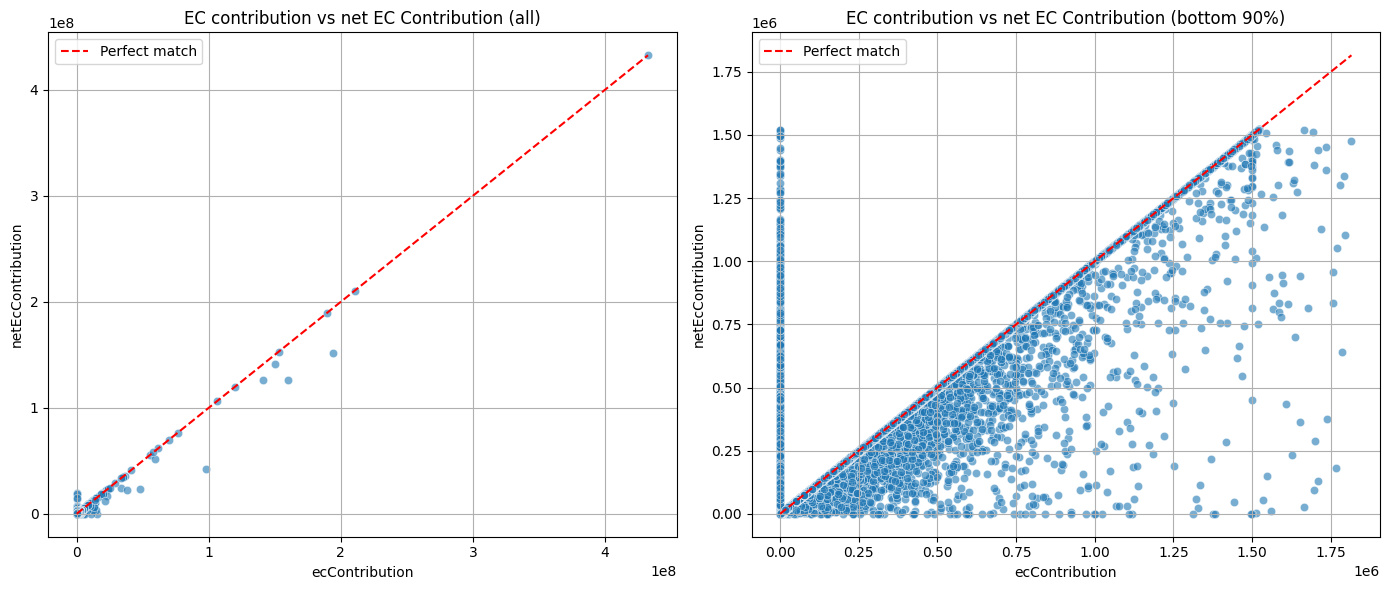

In [87]:
# Define quantile threshold
q_ec = organizations["ecContribution"].quantile(0.95)
q_net = organizations["netEcContribution"].quantile(0.95)

# Filtered data
org_trimmed = organizations[
    (organizations["ecContribution"] <= q_ec) &
    (organizations["netEcContribution"] <= q_net)
]

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False, sharey=False)

# --- Full distribution ---
sns.scatterplot(
    data=organizations,
    x="ecContribution",
    y="netEcContribution",
    alpha=0.6,
    ax=axes[0]
)
min_val = min(organizations["ecContribution"].min(), organizations["netEcContribution"].min())
max_val = max(organizations["ecContribution"].max(), organizations["netEcContribution"].max())
axes[0].plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect match")
axes[0].set_title("EC contribution vs net EC Contribution (all)")
axes[0].set_xlabel("ecContribution")
axes[0].set_ylabel("netEcContribution")
axes[0].legend()
axes[0].grid(True)

# --- Zoomed-in (bottom 90%) ---
sns.scatterplot(
    data=org_trimmed,
    x="ecContribution",
    y="netEcContribution",
    alpha=0.6,
    ax=axes[1]
)
min_trim = min(org_trimmed["ecContribution"].min(), org_trimmed["netEcContribution"].min())
max_trim = max(org_trimmed["ecContribution"].max(), org_trimmed["netEcContribution"].max())
axes[1].plot([min_trim, max_trim], [min_trim, max_trim], color="red", linestyle="--", label="Perfect match")
axes[1].set_title("EC contribution vs net EC Contribution (bottom 90%)")
axes[1].set_xlabel("ecContribution")
axes[1].set_ylabel("netEcContribution")
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


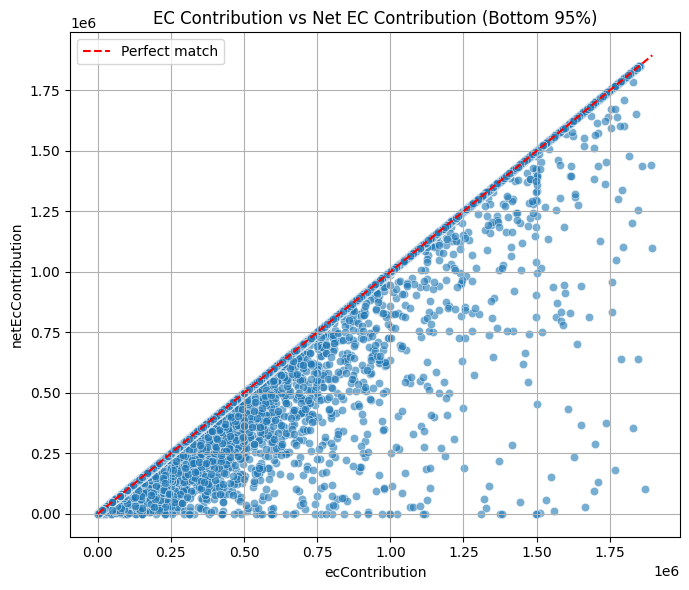

In [88]:
# Define quantile thresholds
q_ec = orgs["ecContribution"].quantile(0.95)
q_net = orgs["netEcContribution"].quantile(0.95)

# Filter to bottom 95% for both EC and net EC
org_trimmed = orgs[
    (orgs["ecContribution"] <= q_ec) &
    (orgs["netEcContribution"] <= q_net)
]

# --- Plot trimmed scatterplot ---
plt.figure(figsize=(7, 6))
sns.scatterplot(
    data=org_trimmed,
    x="ecContribution",
    y="netEcContribution",
    alpha=0.6
)

min_val = min(org_trimmed["ecContribution"].min(), org_trimmed["netEcContribution"].min())
max_val = max(org_trimmed["ecContribution"].max(), org_trimmed["netEcContribution"].max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect match")

plt.title("EC Contribution vs Net EC Contribution (Bottom 95%)")
plt.xlabel("ecContribution")
plt.ylabel("netEcContribution")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
# Step 1: Aggregate org-level data by project
org_agg = orgs.groupby("projectID").agg({
    "ecContribution": "sum",
    "netEcContribution": "sum",
    "totalCost": "sum"
}).rename(columns={
    "ecContribution": "sum_ecContribution",
    "netEcContribution": "sum_netEcContribution",
    "totalCost": "sum_org_totalCost"
})

In [90]:
# Step 2: Select financial fields from projects
project_subset = projects[["id", "acronym", "ecMaxContribution", "totalCost"]].copy()
project_subset = project_subset.rename(columns={
    "totalCost": "project_totalCost"
})


In [91]:
# Step 3: Merge
project_financials = (
    project_subset
    .set_index("id")
    .join(org_agg)
    .reset_index()
)

In [92]:
# Preview
project_financials

,id,acronym,ecMaxContribution,project_totalCost,sum_ecContribution,sum_netEcContribution,sum_org_totalCost
0,101116741,DOE,1499998.0,1499998.0,1499998.0,1499998.0,1499998.0
1,101163161,IRASTRO,12085363.0,12085363.0,12085363.0,12085363.0,12085363.0
2,101160499,In-phase,1489128.0,1489128.0,1489128.0,1489128.0,1489128.0
3,101166905,mw-atlas,9957560.0,9957560.0,9957560.0,9957560.0,9957560.0
4,101162875,MAtCHLESS,1500000.0,1500000.0,1500000.0,1500000.0,1500000.0
...,...,...,...,...,...,...,...
14738,101114220,ModelMe,75000.0,0.0,75000.0,75000.0,0.0
14739,101114193,Cogo,75000.0,0.0,75000.0,75000.0,0.0
14740,101114191,HORIZER,75000.0,0.0,75000.0,75000.0,0.0
14741,101114035,iComplai,75000.0,0.0,75000.0,75000.0,0.0


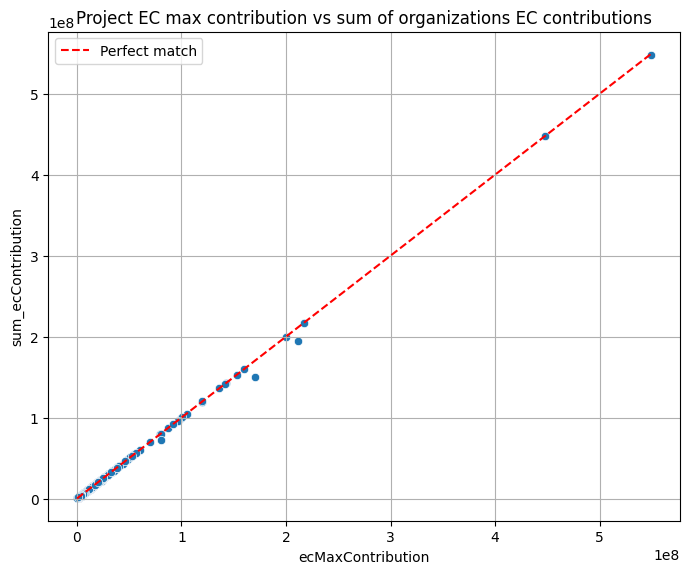

In [93]:
fig, ax = plt.subplots(figsize=(7, 6))

# --- Plot: Project EC Max vs Sum of Org EC Contributions ---
sns.scatterplot(
    data=project_financials,
    x="ecMaxContribution",
    y="sum_ecContribution",
    ax=ax
)
min_val = min(project_financials["ecMaxContribution"].min(), project_financials["sum_ecContribution"].min())
max_val = max(project_financials["ecMaxContribution"].max(), project_financials["sum_ecContribution"].max())
ax.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Perfect match")

ax.set_title("Project EC max contribution vs sum of organizations EC contributions")
ax.set_xlabel("ecMaxContribution")
ax.set_ylabel("sum_ecContribution")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

**Observation:**  
Most points lie close to the diagonal, indicating strong alignment between: Organization level sum of EC contributions vs Project defined Max Contribution  (two large projects (over €400M) deviate slightly, suggesting minor inconsistencies)

**Observation:**  
14,258 projects report an exact match (`ec_diff = 0`).  
Others are distributed across bins from underfunding to excess EU funding (up to €20M).

**Observation:**  
14,271 projects show exact cost match.  
Others range from major underreporting (up to €-200M) to overreporting (€20M+).


## 3.2 EuroSciVoc Topic

Extracts the X-th level label from the euroSciVocPath and returns a dataframe with projectID and the corresponding euroSciVoc label at that level.

In [94]:
level = 3
# Split the path into a list of URIs
euroscivoc["path_list"] = euroscivoc["euroSciVocPath"].str.split("/")
# Extract X-th element from path
euroscivoc["esv_topic"] = euroscivoc["path_list"].apply(lambda path: path[level - 1] if len(path) >= level else path[level-2])

# Define the mapping from esv_topic code to final category label
name_to_final_label = {
    "agricultural biotechnology": "Environmental and agricultural science",
    "agriculture, forestry, and fisheries": "Environmental and agricultural science",
    "animal and dairy science": "Biological and medical science",
    "arts": "Humanities",
    "basic medicine": "Biological and medical science",
    "biological sciences": "Biological and medical science",
    "chemical engineering": "chemical sciences",
    "chemical sciences": "chemical sciences",
    "civil engineering": "Engineering and technology",
    "clinical medicine": "Biological and medical science",
    "computer and information sciences": "computer and information sciences",
    "earth and related environmental sciences": "Environmental and agricultural science",
    "economics and business": "economics and business",
    "educational sciences": "psychology and pedagogy",  # or another, if desired
    "electrical engineering, electronic engineering, information engineering": "Engineering and technology",
    "environmental biotechnology": "Environmental and agricultural science",
    "environmental engineering": "Environmental and agricultural science",
    "health sciences": "Biological and medical science",
    "history and archaeology": "Humanities",
    "industrial biotechnology": "Engineering and technology",
    "languages and literature": "Humanities",
    "law": "Law and political sciences",
    "materials engineering": "Engineering and technology",
    "mathematics": "mathematics & physical sciences",
    "mechanical engineering": "Engineering and technology",
    "media and communications": "Humanities",
    "medical biotechnology": "Biological and medical science",
    "medical engineering": "Biological and medical science",
    "nanotechnology": "Engineering and technology",
    "other agricultural sciences": "Environmental and agricultural science",
    "other engineering and technologies": "Engineering and technology",
    "other humanities": "Humanities",
    "other medical sciences": "Biological and medical science",
    "other social sciences": "Law and political sciences",
    "philosophy, ethics and religion": "Humanities",
    "physical sciences": "mathematics & physical sciences",
    "political sciences": "Law and political sciences",
    "psychology": "psychology and pedagogy",
    "social geography": "Law and political sciences",
    "sociology": "Law and political sciences",
    "veterinary sciences": "Biological and medical science"
}


# # Apply the mapping to create a new column with the final class label
# euroscivoc["final_category"] = euroscivoc["esv_topic"].map(name_to_final_label)
euroscivoc["categories"] = euroscivoc["esv_topic"].map(name_to_final_label)
euroscivoc

,projectID,euroSciVocPath,path_list,esv_topic,categories
0,101116741,/social sciences/political sciences/government...,"[, social sciences, political sciences, govern...",political sciences,Law and political sciences
1,101163161,"/agricultural sciences/agriculture, forestry, ...","[, agricultural sciences, agriculture, forestr...","agriculture, forestry, and fisheries",Environmental and agricultural science
2,101163161,/natural sciences/physical sciences/optics/mic...,"[, natural sciences, physical sciences, optics...",physical sciences,mathematics & physical sciences
3,101163161,/natural sciences/physical sciences/astronomy/...,"[, natural sciences, physical sciences, astron...",physical sciences,mathematics & physical sciences
4,101163161,/social sciences/law,"[, social sciences, law]",law,Law and political sciences
...,...,...,...,...,...
38784,101071191,/natural sciences/computer and information sci...,"[, natural sciences, computer and information ...",computer and information sciences,computer and information sciences
38785,101114487,/medical and health sciences/clinical medicine...,"[, medical and health sciences, clinical medic...",clinical medicine,Biological and medical science
38786,101114060,/medical and health sciences/clinical medicine...,"[, medical and health sciences, clinical medic...",clinical medicine,Biological and medical science
38787,101114240,/medical and health sciences/clinical medicine...,"[, medical and health sciences, clinical medic...",clinical medicine,Biological and medical science


In [95]:
topics_per_project = (
    euroscivoc.groupby("projectID")
    .agg(
        final_categories=("categories", lambda x: list(set(x))),
        final_topics=("esv_topic", lambda x: list(set(x)))
    )
)

In [96]:
topics_per_project

,final_categories,final_topics
projectID,,
101039048,"[mathematics & physical sciences, chemical sci...","[physical sciences, chemical sciences]"
101039060,"[computer and information sciences, Environmen...","[computer and information sciences, earth and ..."
101039066,"[Biological and medical science, Environmental...","[biological sciences, agriculture, forestry, a..."
101039090,"[computer and information sciences, psychology...","[computer and information sciences, educationa..."
101039098,[mathematics & physical sciences],[physical sciences]
...,...,...
190198819,"[Engineering and technology, Environmental and...","[environmental biotechnology, environmental en..."
190199097,"[Engineering and technology, chemical sciences]","[mechanical engineering, chemical sciences]"
190199127,[economics and business],[economics and business]


## 3.3 Derived features

In [97]:
projects["duration_days"] = (projects["endDate"] - projects["startDate"]).dt.days

/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_65543/2537391321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projects["duration_days"] = (projects["endDate"] - projects["startDate"]).dt.days


In [98]:
projects['funding_ratio'] = projects['ecMaxContribution']/projects['totalCost']

/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_65543/1401505452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  projects['funding_ratio'] = projects['ecMaxContribution']/projects['totalCost']


## 3.4 Project-level aggregations

In [99]:
# Only coordinators
coordinators = organizations[organizations["role"].str.lower() == "coordinator"].copy()

# Keep relevant columns (assume lowercase SME is already boolean)
coordinator_info = coordinators[[
    "projectID", "name", "country", "activityType", "SME", 'ecContribution'
]].rename(columns={
    "name": "coordinator_name",
    "country": "coordinator_country",
    "activityType": "coordinator_activityType",
    "SME": "coordinator_SME",
    'ecContribution': 'coordinator_ecContribution'
})

In [100]:
# Lowercase roles just to be safe
organizations["role"] = organizations["role"].str.lower()

# Count per role and project
role_counts = organizations.groupby(["projectID", "role"]).size().unstack(fill_value=0)

# Rename columns for clarity
role_counts = role_counts.rename(columns={
    "participant": "num_participants",
    "associatedpartner": "num_associatedPartners",
    "thirdparty": "num_thirdParties"
})

In [101]:
participant_smes = organizations[
    (organizations["role"] == "participant") & (organizations["SME"] == True)
].groupby("projectID").size().rename("num_participant_smes")


In [102]:
participant_types = organizations[
    organizations["role"] == "participant"
].groupby(["projectID", "activityType"]).size().unstack(fill_value=0)

# Optional: rename columns like "participant_HES", "participant_PRC"
participant_types.columns = [f"participant_{col}" for col in participant_types.columns]

In [103]:
num_deliverables = deliverables.groupby("projectID").size().rename("num_deliverables")
num_publications = publications.groupby("projectID").size().rename("num_publications")
num_reports = reports.groupby("projectID").size().rename("num_reports")

## 3.5 Merging Data

In [104]:
# Start with the base projects table
projects_enriched = projects.copy()

In [105]:
# Merge in all derived fields with left joins
projects_enriched = projects_enriched.merge(num_deliverables, left_on="id", right_on='projectID', how="left")
projects_enriched = projects_enriched.merge(num_publications, left_on="id", right_on='projectID', how="left")
projects_enriched = projects_enriched.merge(num_reports, left_on="id", right_on='projectID',  how="left")

In [106]:
projects_enriched = projects_enriched.merge(coordinator_info, left_on="id", right_on="projectID", how="left").drop(columns=['projectID'])
projects_enriched = projects_enriched.merge(role_counts, left_on="id", right_on="projectID", how="left")

# Fill NaNs for org counts (projects with no such role)
for col in ["num_participants", "num_associatedPartners", "num_thirdParties"]:
    if col not in projects_enriched.columns:
        projects_enriched[col] = 0
    else:
        projects_enriched[col] = projects_enriched[col].fillna(0).astype(int)


In [107]:
# Join SME count
projects_enriched = projects_enriched.merge(
    participant_smes, left_on="id", right_index=True, how="left"
)

In [108]:
# Join activity type counts
projects_enriched = projects_enriched.merge(
    participant_types, left_on="id", right_index=True, how="left"
)


In [109]:
# Select only the columns that are sums over orgs
org_aggregates = project_financials[[
    "id",
    "sum_ecContribution",
    "sum_netEcContribution",
    "sum_org_totalCost"
]].copy()

# Rename columns to clarify they are org-level sums
org_aggregates = org_aggregates.rename(columns={
    "sum_ecContribution": "org_sum_ecContribution",
    "sum_netEcContribution": "org_sum_netEcContribution",
    "sum_org_totalCost": "org_sum_totalCost"
})

In [110]:
# Merge into projects_enriched using 'id'
projects_enriched = projects_enriched.merge(org_aggregates, on="id", how="left")

In [111]:
# Add categories and topics
projects_enriched = projects_enriched.merge(
    topics_per_project, left_on="id", right_index=True, how="left"
)

In [112]:
projects_enriched["num_categories"] = projects_enriched["final_categories"].apply(lambda x: len(x) if isinstance(x, list) else 0)
projects_enriched["num_topics"] = projects_enriched["final_topics"].apply(lambda x: len(x) if isinstance(x, list) else 0)

In [113]:
# Drop projectID duplicate from EuroSciVoc if needed
projects_enriched = projects_enriched.drop(columns=["projectID"], errors="ignore")

In [114]:
# Fill NaNs with 0 (for projects without participants or SME info
projects_enriched["num_participant_smes"] = projects_enriched["num_participant_smes"].fillna(0).astype(int)

for col in participant_types.columns:
    if col not in projects_enriched.columns:
        projects_enriched[col] = 0
    else:
        projects_enriched[col] = projects_enriched[col].fillna(0).astype(int)


In [115]:
# Fill missing numeric fields with 0 where appropriate
fill_zeros = ["num_deliverables", "num_publications", "num_reports"]
for col in fill_zeros:
    projects_enriched[col] = projects_enriched[col].fillna(0).astype(int)


In [116]:
projects_enriched

,id,acronym,title,topics,objective,startDate,endDate,ecSignatureDate,totalCost,ecMaxContribution,...,participant_PRC,participant_PUB,participant_REC,org_sum_ecContribution,org_sum_netEcContribution,org_sum_totalCost,final_categories,final_topics,num_categories,num_topics
0,101116741,DOE,Digitizing Other Economies: A Comparative Appr...,ERC-2023-STG,"How do longstanding, primarily non-industrial,...",2024-02-01,2029-01-31,2023-12-15,1499998.0,1499998.0,...,0,0,0,1499998.0,1499998.0,1499998.0,[Law and political sciences],[political sciences],1,1
1,101163161,IRASTRO,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,ERC-2024-SyG,The James Webb Space Telescope (JWST) has ushe...,2025-08-01,2031-07-31,2025-02-20,12085363.0,12085363.0,...,0,0,0,12085363.0,12085363.0,12085363.0,"[mathematics & physical sciences, Environmenta...","[physical sciences, agriculture, forestry, and...",3,3
2,101160499,In-phase,Multiscale modelling of aberrant phase transit...,ERC-2024-STG,The spatiotemporal organization of the cell ma...,2025-06-01,2030-05-31,2025-02-19,1489128.0,1489128.0,...,0,0,0,1489128.0,1489128.0,1489128.0,[Biological and medical science],[biological sciences],1,1
3,101166905,mw-atlas,The first comprehensive Atlas of the Milky Way,ERC-2024-SyG,The Milky Way is the cosmic environment in whi...,2025-05-01,2031-04-30,2025-02-20,9957560.0,9957560.0,...,0,0,1,9957560.0,9957560.0,9957560.0,"[mathematics & physical sciences, Environmenta...","[physical sciences, earth and related environm...",2,2
4,101162875,MAtCHLESS,Untapping multiparametric 2D luminescence sens...,ERC-2024-STG,Cellular organisms are complex machines whose ...,2025-03-01,2030-02-28,2025-02-18,1500000.0,1500000.0,...,0,0,0,1500000.0,1500000.0,1500000.0,"[Engineering and technology, Biological and me...","[clinical medicine, physical sciences, biologi...",3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,101114220,ModelMe,Deployment of ModelMe Innovation,HORIZON-EIE-2022-SCALEUP-02-02,The primary objective of the work performed wi...,2023-07-01,2024-01-31,2023-06-01,0.0,75000.0,...,0,0,0,75000.0,75000.0,0.0,NaN,NaN,0,0
14739,101114193,Cogo,Cogo - all ride in one app. Cogo gathers elect...,HORIZON-EIE-2022-SCALEUP-02-02,Bibi Blomqvist co-founder and COO of Cogo ApS....,2023-07-01,2024-06-30,2023-06-19,0.0,75000.0,...,0,0,0,75000.0,75000.0,0.0,NaN,NaN,0,0
14740,101114191,HORIZER,HORIZER,HORIZON-EIE-2022-SCALEUP-02-02,"In Women TechEU, HORIZER aims, over the next 9...",2023-07-01,2024-03-31,2023-06-05,0.0,75000.0,...,0,0,0,75000.0,75000.0,0.0,NaN,NaN,0,0
14741,101114035,iComplai,AI-powered early warning and surveillance syst...,HORIZON-EIE-2022-SCALEUP-02-02,A product recall is the process of retrieving ...,2023-07-01,2024-03-31,2023-06-01,0.0,75000.0,...,0,0,0,75000.0,75000.0,0.0,NaN,NaN,0,0


## 3.6 Evaluate NLP and fill in topics

In [ ]:
#Step 1: load NLP model

from transformers import pipeline

classifier = pipeline(
    "zero-shot-classification",
    model="facebook/bart-large-mnli",
    framework="pt"  # <- this forces PyTorch backend
)

In [ ]:
#Generate a list of classes

import pandas as pd
from tqdm import tqdm
tqdm.pandas()

# Define your list of topic labels
labels = [
    "Biological and medical science",
    "Engineering and technology",
    "Environmental and agricultural science",
    "Humanities",
    "Law and political sciences",
    "computer and information sciences",
    "economics and business",
    "mathematics & physical sciences",
    "psychology and pedagogy"
]

# Function to classify a single text
def classify_objective(text):
    if pd.isnull(text) or not text.strip():
        return None
    result = classifier(text, candidate_labels=labels, multi_label=True)
    return {'labels': result['labels'], 'scores': result['scores']}

In [ ]:
#choose a sample of 100 rows and evaluate the NLP model
sample =  projects_enriched[projects_enriched['final_category'].notna()].head(100)
sample

In [ ]:
#Create the results using the NLP model to predict topics and scores
results_obj = sample['objective'].progress_apply(classify_objective)
results_title = sample['title'].progress_apply(classify_objective)

In [ ]:
sample['labels_obj'] = results_obj.apply(lambda x: x['labels'] if x is not None else [])
sample['scores_obj'] = results_obj.apply(lambda x: x['scores'] if x is not None else [])
sample['labels_title'] = results_title.apply(lambda x: x['labels'] if x is not None else [])
sample['scores_title'] = results_title.apply(lambda x: x['scores'] if x is not None else [])
sample

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, precision_score, recall_score, jaccard_score, hamming_loss

def evaluate_metrics(sample, pred_label_col, pred_score_col, true_col='final_category', thresholds=np.linspace(0, 1, 80)):
    # 1. Get all unique labels from both predicted and true to build label space
    all_labels = sorted(
        set(label for sublist in sample[pred_label_col] for label in sublist) |
        set(label for sublist in sample[true_col] for label in sublist)
    )

    # 2. Initialize MultiLabelBinarizer with all labels
    mlb = MultiLabelBinarizer(classes=all_labels)
    mlb.fit(all_labels)

    # 3. Binarize true labels
    y_true = mlb.transform(sample[true_col])

    # 4. Function to threshold predicted labels based on score
    def threshold_preds(labels, scores, threshold):
        return [label for label, score in zip(labels, scores) if score >= threshold]

    # 5. Store metrics for each threshold
    metrics_per_threshold = []

    for thr in thresholds:
        # 6. Threshold predictions
        predicted_labels = [
            threshold_preds(row_labels, row_scores, thr)
            for row_labels, row_scores in zip(sample[pred_label_col], sample[pred_score_col])
        ]

        # 7. Binarize predicted labels
        y_pred = mlb.transform(predicted_labels)

        # 8. Calculate metrics
        f1 = f1_score(y_true, y_pred, average='micro')
        precision = precision_score(y_true, y_pred, average='micro')
        recall = recall_score(y_true, y_pred, average='micro')
        jaccard = jaccard_score(y_true, y_pred, average='samples')
        hamming = hamming_loss(y_true, y_pred)

        # 9. Store results
        metrics_per_threshold.append({
            'threshold': thr,
            'f1_score': f1,
            'precision': precision,
            'recall': recall,
            'jaccard': jaccard,
            'hamming_loss': hamming
        })

    # 10. Return metrics as DataFrame
    return pd.DataFrame(metrics_per_threshold)


metrics_title = evaluate_metrics(sample, pred_label_col='labels_title', pred_score_col='scores_title')
metrics_obj = evaluate_metrics(sample, pred_label_col='labels_obj', pred_score_col='scores_obj')


In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(metrics_df, label, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(metrics_df['threshold'], metrics_df['f1_score'], label='F1 Score', marker='o')
    ax.plot(metrics_df['threshold'], metrics_df['precision'], label='Precision', marker='o')
    ax.plot(metrics_df['threshold'], metrics_df['recall'], label='Recall', marker='o')
    ax.plot(metrics_df['threshold'], metrics_df['jaccard'], label='Jaccard', marker='o')
    ax.plot(metrics_df['threshold'], metrics_df['hamming_loss'], label='Hamming Loss', marker='o')
    ax.set_title(f'Metrics vs Threshold ({label})')
    ax.set_xlabel('Threshold')
    ax.set_ylabel('Score')
    ax.legend()
    ax.grid(True)

# The rest remains the same as before:
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

metrics_title = evaluate_metrics(sample, 'labels_title', 'scores_title')
metrics_objective = evaluate_metrics(sample, 'labels_obj', 'scores_obj')

plot_metrics(metrics_title, 'Title', axes[0])
plot_metrics(metrics_objective, 'Objective', axes[1])

plt.tight_layout()
plt.show()


## 3.7 Save dataframes as pickle files for Shiny dashboard

In [ ]:
projects_enriched.to_pickle('Data/PE.pkl')
projects_enriched

In [ ]:
project_financials.to_pickle("Data/finance.pkl")

# 4. Visuals/Dashboard (see app.py)
- Maps and Charts
- Dashboard structure
- serves as EDA

#### Merging

In [ ]:
#Now I want to add a column to the projects dataframe that contains information on the country based on the project ID.

projects.rename(columns={"id": "projectID"}, inplace=True)


projects = projects.merge(
    organizations[["projectID", "country"]],
    on="projectID",
    how="left"
)

projects.info()
projects.head()

In [ ]:
# Group by country and summarize total and average ecMaxContribution
funding_summary = (
    projects.groupby("country")["ecMaxContribution"]
    .agg(["count", "sum", "mean"])
    .reset_index()
    .rename(columns={"count": "project_count", "sum": "total_funding", "mean": "avg_funding"})
)

print(funding_summary)

In [ ]:
import pycountry

def alpha2_to_alpha3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Apply to your dataframe
funding_summary["iso_alpha"] = funding_summary["country"].apply(alpha2_to_alpha3)

# Fix known missing ones
funding_summary.loc[funding_summary["country"] == "XK", "iso_alpha"] = "XKX"  # Kosovo

funding_summary.head()

In [ ]:
import pandas as pd

def get_funding_summary():
    df = pd.read_csv("Data/projects.csv")  # or do your full processing here
    summary = df.groupby("country")["ecMaxContribution"].agg(["count", "sum", "mean"]).reset_index()
    summary.columns = ["country", "project_count", "total_funding", "avg_funding"]
    return summary

# 5. Model: EDA

## 5.1 Organizations; activity types and roles

### 🏢 Organization-Level Insights

#### General Trends

- **Most organizations** appear in only one project, but a small core group is involved in dozens or even hundreds.
- **Countries** are more evenly distributed than organizations, with many involved in 100+ projects.
- **Activity type** clearly influences funding: higher education (HES) and research centers (REC) tend to receive more EC on average than companies (PRC) or public bodies (PUB).
- **Roles matter**: the same organization typically receives more EC as a coordinator than as a participant.

These trends confirm that both **who** participates and **in what role** significantly influence project funding outcomes.


In [124]:
organizations = organizations[(organizations['role'] != 'associatedpartner') & (organizations['role'] != 'thirdparty')]

In [125]:
organizations

,projectID,projectAcronym,organisationID,name,SME,activityType,role,country,city,contentUpdateDate,endOfParticipation,rcn,ecContribution,netEcContribution,totalCost
0,101116741,DOE,999981634,WAGENINGEN UNIVERSITY,False,HES,coordinator,NL,Wageningen,2023-12-26 14:40:12,False,1906458,1499998.00,1499998.00,1499998.00
1,101163161,IRASTRO,999997736,AARHUS UNIVERSITET,False,HES,participant,DK,Aarhus C,2025-02-24 17:23:14,False,1905956,4246240.00,4246240.00,4246240.00
2,101163161,IRASTRO,999854855,UNIVERSITAET POTSDAM,False,HES,participant,DE,Potsdam,2025-02-24 17:23:14,False,1908936,1982813.00,1982813.00,1982813.00
3,101163161,IRASTRO,999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,False,REC,coordinator,DE,Munchen,2025-02-24 17:23:14,False,1949732,5856310.00,5856310.00,5856310.00
4,101160499,In-phase,999874546,UNIVERSIDAD COMPLUTENSE DE MADRID,False,HES,coordinator,ES,Madrid,2025-02-24 17:23:11,False,1906229,1489128.00,1489128.00,1489128.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100057,101114035,iComplai,885025576,ICOMPLAI UG,True,PRC,coordinator,DE,Hoehenkirchen-Siegertsbrunn,2023-06-28 17:02:39,False,1981619,75000.00,75000.00,0.00
100058,101121353,E2i,983211983,"GLOBAZ, S.A.",True,PRC,coordinator,PT,Oliveira De Azemeis,2023-08-10 18:08:28,False,1920769,353541.25,353541.25,353541.25
100060,101121353,E2i,908208188,DPT - DEUTSCHER PRAVENTIONSTAG,False,OTH,participant,DE,Koln,2023-08-10 18:08:28,False,1946983,311172.50,311172.50,311172.50
100061,101121353,E2i,951909016,LANDESKRIMINALAMT NIEDERSACHSEN,False,PUB,participant,DE,Hannover,2023-08-10 18:08:28,False,1946981,262848.75,262848.75,262848.75


In [129]:
print(bin_counts_coord)

count
1         1981
2–5        711
6–10       189
11–30      168
31–100      88
100+        16
Name: count, dtype: int64


In [131]:
print(bin_counts_part)

count
1         12697
2–5        5412
6–10       1009
11–30       670
31–100      210
100+         44
Name: count, dtype: int64


/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_65543/370045355.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = org_activity_counts.groupby(["bin", "activityType"]).size().unstack(fill_value=0)


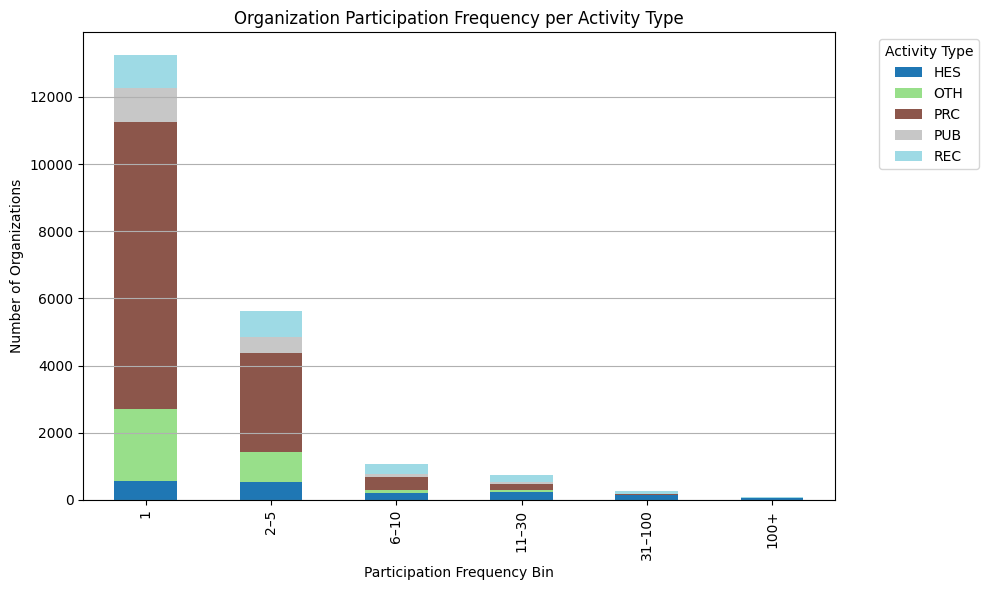

In [165]:
# Count participation frequency per org per activity type
org_activity_counts = organizations.groupby(["name", "activityType"]).size().reset_index(name="count")

# Bin the counts
bins = [0, 1, 5, 10, 30, 100, org_activity_counts["count"].max()]
labels = ["1", "2–5", "6–10", "11–30", "31–100", "100+"]

org_activity_counts["bin"] = pd.cut(org_activity_counts["count"], bins=bins, labels=labels, right=True)

# Pivot to get counts per bin per activityType
binned_counts = org_activity_counts.groupby(["bin", "activityType"]).size().unstack(fill_value=0)

# Sort bins in correct order
binned_counts = binned_counts.reindex(labels)

# Plot stacked bar chart
binned_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    colormap="tab20"  # change if you want specific colors
)

plt.title("Organization Participation Frequency per Activity Type")
plt.xlabel("Participation Frequency Bin")
plt.ylabel("Number of Organizations")
plt.grid(axis="y")
plt.legend(title="Activity Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [167]:
print(binned_counts)

activityType  HES   OTH   PRC   PUB  REC
bin                                     
1             549  2162  8542  1013  996
2–5           542   872  2971   452  797
6–10          194   114   386    90  288
11–30         230    59   192    42  220
31–100        144     2    28     3   85
100+           62     0     0     0   26


Many organisations with only 1 or very few occurences --> group them at country level

/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_62922/758928449.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_counts.index, y=bin_counts.values, palette="Blues", ax=ax)


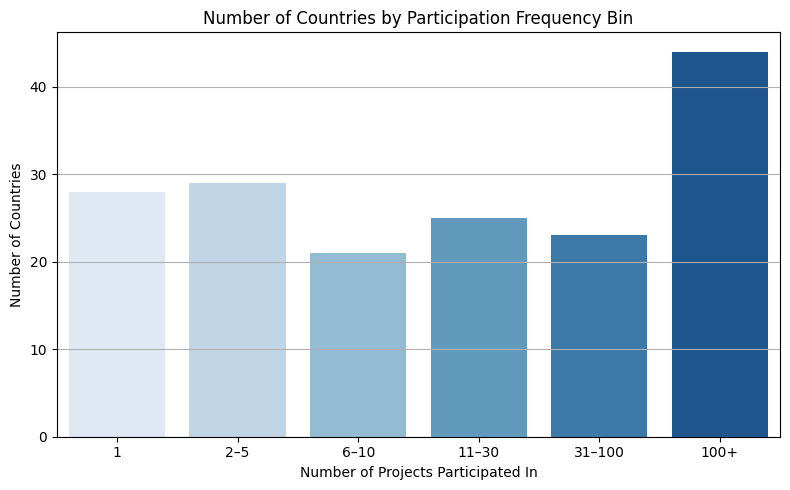

In [67]:
# Count how often each org appears
country_freq = organizations["country"].value_counts()

# Bin by number of occurrences
bins = [0, 1, 5, 10, 30, 100, country_freq.max()]
labels = ["1", "2–5", "6–10", "11–30", "31–100", "100+"]

country_freq_binned = pd.cut(country_freq, bins=bins, labels=labels, right=True)
bin_counts = country_freq_binned.value_counts().sort_index()

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(x=bin_counts.index, y=bin_counts.values, palette="Blues", ax=ax)

ax.set_title("Number of Countries by Participation Frequency Bin")
ax.set_xlabel("Number of Projects Participated In")
ax.set_ylabel("Number of Countries")
ax.grid(axis="y")
plt.tight_layout()
plt.show()


We see that there is still a relatively big share of countries that occur only once, might need to group them further

In [68]:
org_type_variants = organizations.groupby("name")["activityType"].nunique()
orgs_with_multiple_types = org_type_variants[org_type_variants > 1]
orgs_with_multiple_types

name
GREEN ENERGY PARK                                                     2
INSTITUT D'AMENAGEMENT ET D'URBANISME DE LA REGION D'ILE DE FRANCE    2
The University of Electro-Communications                              2
UNIVERSITATEA DE STAT DIN MOLDOVA                                     2
Name: activityType, dtype: int64

In [69]:
#organizations[organizations['name'] == 'GREEN ENERGY PARK']
#organizations[organizations['name'] == "INSTITUT D'AMENAGEMENT ET D'URBANISME DE LA REGION D'ILE DE FRANCE"]
#organizations[organizations['name'] == "The University of Electro-Communications"]
organizations[organizations['name'] == "UNIVERSITATEA DE STAT DIN MOLDOVA"]

,projectID,projectAcronym,organisationID,name,SME,activityType,role,country,city,contentUpdateDate,endOfParticipation,rcn,ecContribution,netEcContribution,totalCost
15557,101132314,RE-ENGAGE,996760361,UNIVERSITATEA DE STAT DIN MOLDOVA,False,HES,participant,MD,CHISINAU,2023-11-10 10:02:04,False,2060074,63187.5,63187.5,63187.5
34863,101157360,iNNO SED,996760361,UNIVERSITATEA DE STAT DIN MOLDOVA,False,HES,participant,MD,CHISINAU,2024-06-19 10:40:04,False,2060074,50000.0,50000.0,50000.0
45040,101179323,STAR,996760361,UNIVERSITATEA DE STAT DIN MOLDOVA,False,HES,participant,MD,CHISINAU,2024-09-12 12:05:17,False,2060074,128800.0,128800.0,0.0
49769,101131382,CLEANWATER,996760361,UNIVERSITATEA DE STAT DIN MOLDOVA,False,HES,participant,MD,CHISINAU,2023-11-08 18:09:13,False,2060074,128800.0,128800.0,0.0
75392,101113015,DaWetRest,996697117,UNIVERSITATEA DE STAT DIN MOLDOVA,False,REC,participant,MD,Chisinau,2024-09-06 18:26:56,False,2194275,50687.5,50687.5,50687.5


4 organisations that have different activity types, remove those? <br>
usually just one occurence different than others, could also change it to majority?

In [134]:
# Step 1: Compute total EC funding per project (summing org-level ecContribution)
project_total_ec = (
    organizations.groupby("projectID")["netEcContribution"]
    .sum()
    .rename("project_total_ec")
)

# Step 2: Merge that back into the organizations dataframe
organizations = organizations.merge(project_total_ec, on="projectID", how="left")

# Step 3: Compute the organization's EC share of the total project EC
organizations["org_share"] = organizations["ecContribution"] / organizations["project_total_ec"]


In [135]:
organizations

,projectID,projectAcronym,organisationID,name,SME,activityType,role,country,city,contentUpdateDate,endOfParticipation,rcn,ecContribution,netEcContribution,totalCost,project_total_ec,org_share
0,101116741,DOE,999981634,WAGENINGEN UNIVERSITY,False,HES,coordinator,NL,Wageningen,2023-12-26 14:40:12,False,1906458,1499998.00,1499998.00,1499998.00,1499998.0,1.000000
1,101163161,IRASTRO,999997736,AARHUS UNIVERSITET,False,HES,participant,DK,Aarhus C,2025-02-24 17:23:14,False,1905956,4246240.00,4246240.00,4246240.00,12085363.0,0.351354
2,101163161,IRASTRO,999854855,UNIVERSITAET POTSDAM,False,HES,participant,DE,Potsdam,2025-02-24 17:23:14,False,1908936,1982813.00,1982813.00,1982813.00,12085363.0,0.164067
3,101163161,IRASTRO,999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,False,REC,coordinator,DE,Munchen,2025-02-24 17:23:14,False,1949732,5856310.00,5856310.00,5856310.00,12085363.0,0.484579
4,101160499,In-phase,999874546,UNIVERSIDAD COMPLUTENSE DE MADRID,False,HES,coordinator,ES,Madrid,2025-02-24 17:23:11,False,1906229,1489128.00,1489128.00,1489128.00,1489128.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,101114035,iComplai,885025576,ICOMPLAI UG,True,PRC,coordinator,DE,Hoehenkirchen-Siegertsbrunn,2023-06-28 17:02:39,False,1981619,75000.00,75000.00,0.00,75000.0,1.000000
79849,101121353,E2i,983211983,"GLOBAZ, S.A.",True,PRC,coordinator,PT,Oliveira De Azemeis,2023-08-10 18:08:28,False,1920769,353541.25,353541.25,353541.25,1286125.0,0.274889
79850,101121353,E2i,908208188,DPT - DEUTSCHER PRAVENTIONSTAG,False,OTH,participant,DE,Koln,2023-08-10 18:08:28,False,1946983,311172.50,311172.50,311172.50,1286125.0,0.241946
79851,101121353,E2i,951909016,LANDESKRIMINALAMT NIEDERSACHSEN,False,PUB,participant,DE,Hannover,2023-08-10 18:08:28,False,1946981,262848.75,262848.75,262848.75,1286125.0,0.204373


In [136]:
num_participants = organizations.groupby("projectID")['name'].count().rename('num_participants')
organizations = organizations.merge(num_participants, on='projectID', how='left')

In [137]:
organizations["deviation_ratio"] = organizations["org_share"] * organizations["num_participants"]

In [138]:
organizations

,projectID,projectAcronym,organisationID,name,SME,activityType,role,country,city,contentUpdateDate,endOfParticipation,rcn,ecContribution,netEcContribution,totalCost,project_total_ec,org_share,num_participants,deviation_ratio
0,101116741,DOE,999981634,WAGENINGEN UNIVERSITY,False,HES,coordinator,NL,Wageningen,2023-12-26 14:40:12,False,1906458,1499998.00,1499998.00,1499998.00,1499998.0,1.000000,1,1.000000
1,101163161,IRASTRO,999997736,AARHUS UNIVERSITET,False,HES,participant,DK,Aarhus C,2025-02-24 17:23:14,False,1905956,4246240.00,4246240.00,4246240.00,12085363.0,0.351354,3,1.054062
2,101163161,IRASTRO,999854855,UNIVERSITAET POTSDAM,False,HES,participant,DE,Potsdam,2025-02-24 17:23:14,False,1908936,1982813.00,1982813.00,1982813.00,12085363.0,0.164067,3,0.492202
3,101163161,IRASTRO,999990267,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,False,REC,coordinator,DE,Munchen,2025-02-24 17:23:14,False,1949732,5856310.00,5856310.00,5856310.00,12085363.0,0.484579,3,1.453736
4,101160499,In-phase,999874546,UNIVERSIDAD COMPLUTENSE DE MADRID,False,HES,coordinator,ES,Madrid,2025-02-24 17:23:11,False,1906229,1489128.00,1489128.00,1489128.00,1489128.0,1.000000,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79848,101114035,iComplai,885025576,ICOMPLAI UG,True,PRC,coordinator,DE,Hoehenkirchen-Siegertsbrunn,2023-06-28 17:02:39,False,1981619,75000.00,75000.00,0.00,75000.0,1.000000,1,1.000000
79849,101121353,E2i,983211983,"GLOBAZ, S.A.",True,PRC,coordinator,PT,Oliveira De Azemeis,2023-08-10 18:08:28,False,1920769,353541.25,353541.25,353541.25,1286125.0,0.274889,4,1.099555
79850,101121353,E2i,908208188,DPT - DEUTSCHER PRAVENTIONSTAG,False,OTH,participant,DE,Koln,2023-08-10 18:08:28,False,1946983,311172.50,311172.50,311172.50,1286125.0,0.241946,4,0.967783
79851,101121353,E2i,951909016,LANDESKRIMINALAMT NIEDERSACHSEN,False,PUB,participant,DE,Hannover,2023-08-10 18:08:28,False,1946981,262848.75,262848.75,262848.75,1286125.0,0.204373,4,0.817491


In [158]:
# Group by both activityType and role
group = organizations.groupby(["activityType", "role"])

# Compute total, count, mean EC contribution
activity_role_funding = group["ecContribution"].sum().round(2)
activity_role_count = group.size()
activity_role_funding_mean = group["ecContribution"].mean().round(2)

# Compute mean org_share only for finite values
finite_orgs = organizations[np.isfinite(organizations["deviation_ratio"])]
activity_role_share_mean = (
    finite_orgs.groupby(["activityType", "role"])["deviation_ratio"]
    .mean()
    .round(4)
)

# Combine into a DataFrame
activity_role_summary = pd.DataFrame({
    "total_ec": activity_role_funding,
    "num_projects": activity_role_count,
    "mean_ec": activity_role_funding_mean,
    "mean_org_share": activity_role_share_mean
})

In [160]:
print(activity_role_summary)

                              total_ec  num_projects     mean_ec  \
activityType role                                                  
HES          coordinator  8.187763e+09          8681   943182.02   
             participant  7.058052e+09         17832   395808.22   
OTH          coordinator  1.210390e+09           346  3498236.82   
             participant  1.761014e+09          6149   286390.29   
PRC          coordinator  3.201898e+09          1847  1733567.10   
             participant  8.125653e+09         21765   373335.77   
PUB          coordinator  1.547516e+08           121  1278938.79   
             participant  1.418402e+09          3668   386696.35   
REC          coordinator  5.749391e+09          4321  1330569.58   
             participant  6.782589e+09         15108   448940.24   

                          mean_org_share  
activityType role                         
HES          coordinator          1.3535  
             participant          0.9409  
OTH        

/var/folders/l8/ftm6dgxs31x_ztyt958ndqt00000gn/T/ipykernel_62922/3411342803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_summary.index, y=activity_summary.mean_net_ec, palette="Blues", legend=False)


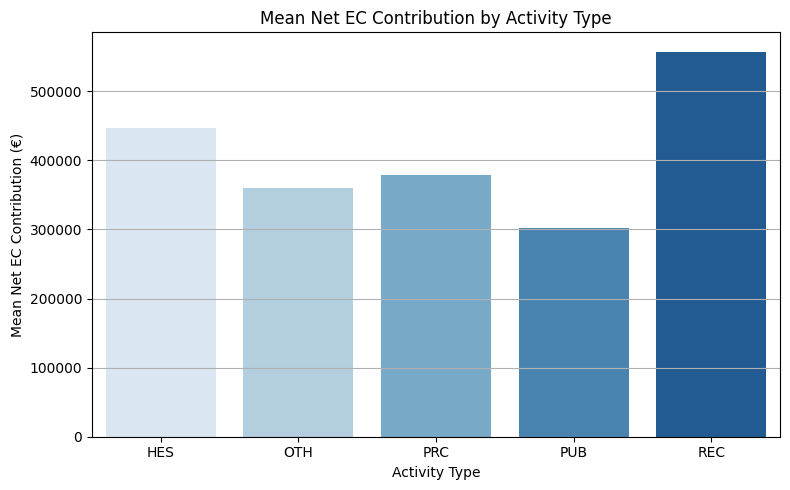

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=activity_summary.index, y=activity_summary.mean_net_ec, palette="Blues", legend=False)

plt.title("Mean Net EC Contribution by Activity Type")
plt.ylabel("Mean Net EC Contribution (€)")
plt.xlabel("Activity Type")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


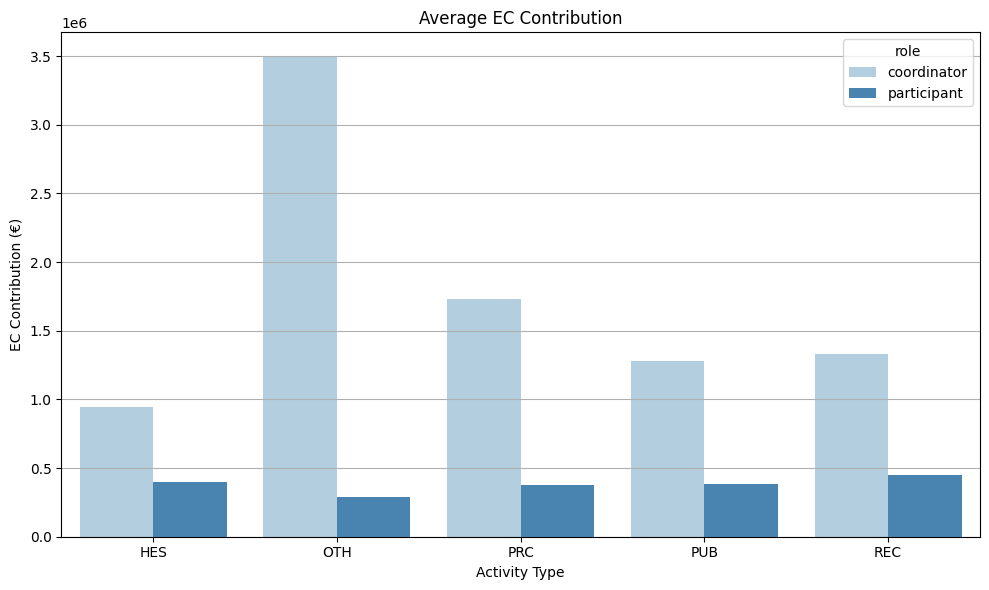

In [168]:
# Reset index for seaborn
df_plot = activity_role_summary.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_plot,
    x="activityType",
    y="mean_ec",
    hue="role",
    palette="Blues"
)

plt.title("Average EC Contribution")
plt.ylabel("EC Contribution (€)")
plt.xlabel("Activity Type")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

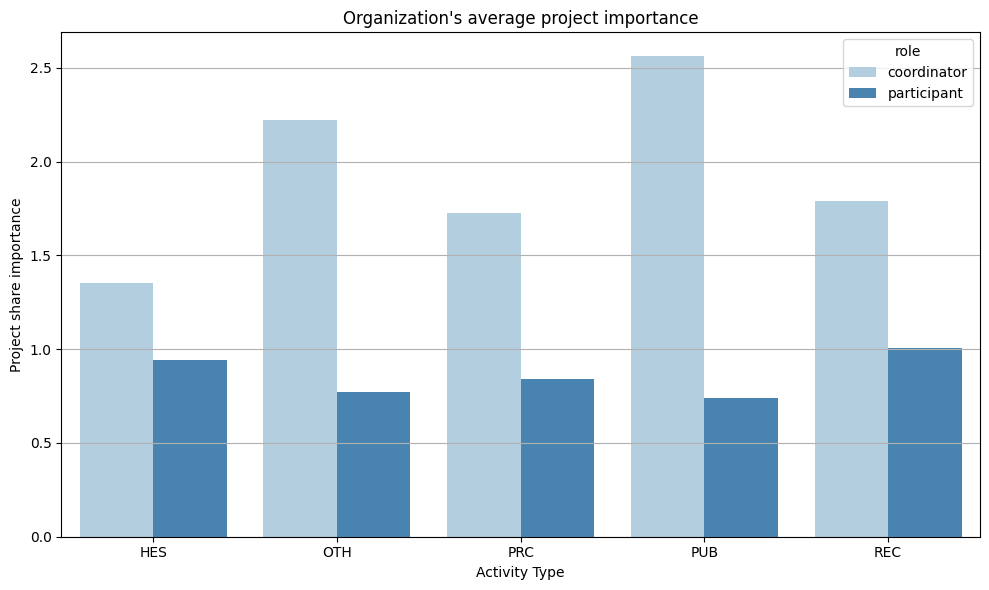

In [ ]:
# Reset index for seaborn
df_plot = activity_role_summary.reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_plot,
    x="activityType",
    y="mean_org_share",
    hue="role",
    palette="Blues"
)

plt.title("Organization's average project importance")
plt.ylabel("Project share importance")
plt.xlabel("Activity Type")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


This shows that the funding varies according to the activity type of the organization; <br> with the most funding going to research center ans higher or secondary education <br> private for profit companies, public bodies and others (NGO, foundation) receive on average less

In [144]:
org_ec_median = organizations.groupby("name")["ecContribution"].median()
org_ec_mean = organizations.groupby("name")["ecContribution"].mean()

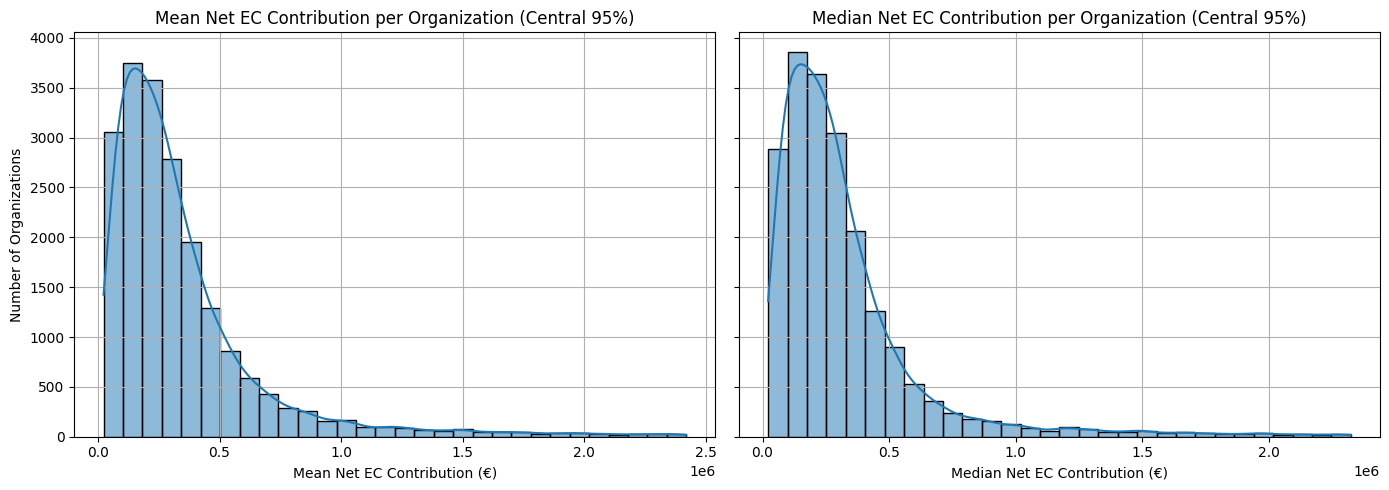

In [145]:
# Trim to central 95% for both
q_low_mean = org_ec_mean.quantile(0.025)
q_high_mean = org_ec_mean.quantile(0.975)
org_ec_mean_trimmed = org_ec_mean[(org_ec_mean >= q_low_mean) & (org_ec_mean <= q_high_mean)]

q_low_med = org_ec_median.quantile(0.025)
q_high_med = org_ec_median.quantile(0.975)
org_ec_median_trimmed = org_ec_median[(org_ec_median >= q_low_med) & (org_ec_median <= q_high_med)]

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(org_ec_mean_trimmed, bins=30, kde=True, ax=axes[0])
axes[0].set_title("Mean Net EC Contribution per Organization (Central 95%)")
axes[0].set_xlabel("Mean Net EC Contribution (€)")
axes[0].set_ylabel("Number of Organizations")
axes[0].grid(True)

sns.histplot(org_ec_median_trimmed, bins=30, kde=True, ax=axes[1])
axes[1].set_title("Median Net EC Contribution per Organization (Central 95%)")
axes[1].set_xlabel("Median Net EC Contribution (€)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [161]:
org_group = organizations.groupby(["name", "activityType", "role"])["ecContribution"]
org_ec_mean = org_group.mean()
org_ec_median = org_group.median()

In [162]:
# Trim mean
q_low_mean = org_ec_mean.quantile(0.025)
q_high_mean = org_ec_mean.quantile(0.975)
org_ec_mean_trimmed = org_ec_mean[(org_ec_mean >= q_low_mean) & (org_ec_mean <= q_high_mean)]

# Trim median
q_low_med = org_ec_median.quantile(0.025)
q_high_med = org_ec_median.quantile(0.975)
org_ec_median_trimmed = org_ec_median[(org_ec_median >= q_low_med) & (org_ec_median <= q_high_med)]


In [163]:
mean_df = org_ec_mean_trimmed.reset_index(name="mean_ec")
median_df = org_ec_median_trimmed.reset_index(name="median_ec")

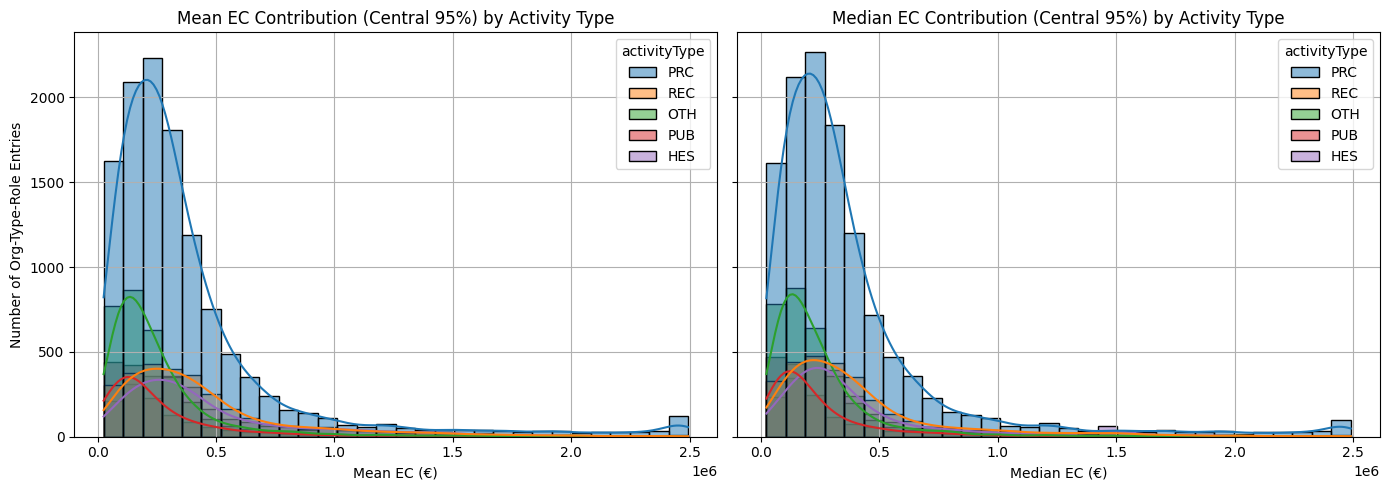

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(data=mean_df, x="mean_ec", bins=30, kde=True, hue="activityType", ax=axes[0])
axes[0].set_title("Mean EC Contribution (Central 95%) by Activity Type")
axes[0].set_xlabel("Mean EC (€)")
axes[0].set_ylabel("Number of Org-Type-Role Entries")
axes[0].grid(True)

sns.histplot(data=median_df, x="median_ec", bins=30, kde=True, hue="activityType", ax=axes[1])
axes[1].set_title("Median EC Contribution (Central 95%) by Activity Type")
axes[1].set_xlabel("Median EC (€)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


These graphs show that the net EC contribution varies according to the organization

In [72]:
# Sum EC per org-role pair
org_role_funding = organizations.groupby(["name", "role"])["netEcContribution"].sum().unstack(fill_value=0)


In [73]:
# Filter to relevant roles
roles = organizations[organizations["role"].isin(["coordinator", "participant"])].copy()

# Sum EC per project × role
project_role_ec = (
    roles.groupby(["projectID", "role"])["netEcContribution"].sum().unstack(fill_value=0)
)

# Compute coordinator share per project
project_role_ec["coord_share"] = project_role_ec["coordinator"] / (
    project_role_ec["coordinator"] + project_role_ec["participant"]
)

# Merge back coordinator orgs
coordinators = organizations[organizations["role"] == "coordinator"][["projectID", "name"]]
project_role_ec = project_role_ec.merge(coordinators, on="projectID", how="left")

# Average coordinator share per coordinator org
coord_share_per_org = project_role_ec.groupby("name")["coord_share"].mean()

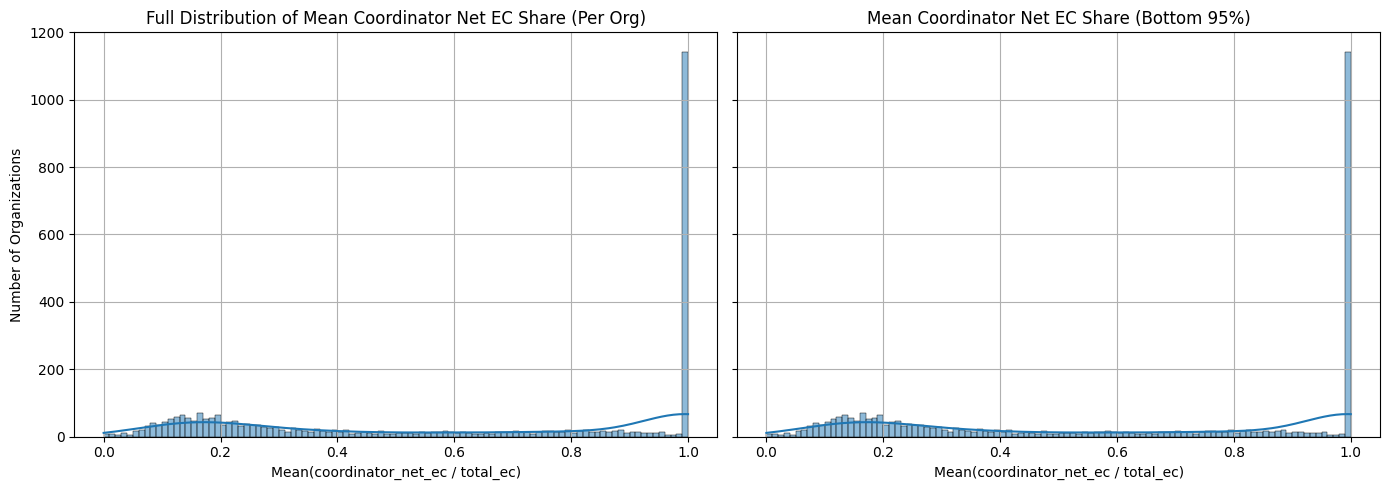

In [74]:
# Step 5: Full and trimmed series
coord_full = coord_share_per_org
coord_trimmed = coord_full[coord_full <= coord_full.quantile(0.95)]

# Step 6: Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.histplot(coord_full, bins=100, kde=True, ax=axes[0])
axes[0].set_title("Full Distribution of Mean Coordinator Net EC Share (Per Org)")
axes[0].set_xlabel("Mean(coordinator_net_ec / total_ec)")
axes[0].set_ylabel("Number of Organizations")
axes[0].grid(True)

sns.histplot(coord_trimmed, bins=100, kde=True, ax=axes[1])
axes[1].set_title("Mean Coordinator Net EC Share (Bottom 95%)")
axes[1].set_xlabel("Mean(coordinator_net_ec / total_ec)")
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [75]:
project_role_ec

,projectID,coordinator,participant,coord_share,name
0,101039048,1496205.0,0.0,1.000000,FUNDACION DONOSTIA INTERNATIONAL PHYSICS CENTER
1,101039060,1436150.0,63000.0,0.957976,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...
2,101039066,1482050.0,0.0,1.000000,UNIWERSYTET IM. ADAMA MICKIEWICZA WPOZNANIU
3,101039090,1495000.0,0.0,1.000000,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...
4,101039098,1458688.0,0.0,1.000000,UNIVERSITY OF HAMBURG
...,...,...,...,...,...
15332,190198819,2402487.0,0.0,1.000000,FIMUSKRAFT
15333,190199097,1290322.0,0.0,1.000000,SIMPLICITY WORKS EUROPE SL
15334,190199127,1518882.5,0.0,1.000000,ABZU APS
15335,190199469,2402750.0,0.0,1.000000,NANORDICA MEDICAL OU


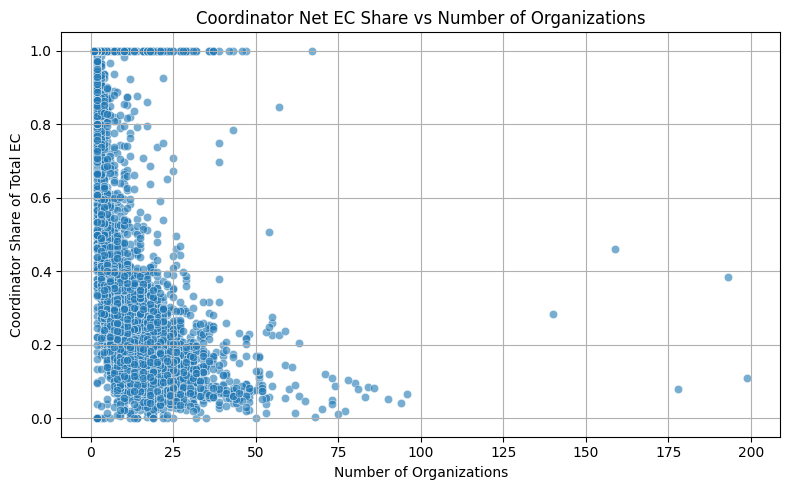

In [76]:
# --- Total EC per project ---
total_ec = organizations.groupby("projectID")["netEcContribution"].sum().rename("total_ec")

# --- Coordinator EC per project ---
coord_ec = (
    organizations[organizations["role"].str.lower() == "coordinator"]
    .groupby("projectID")["netEcContribution"]
    .sum()
    .rename("coord_ec")
)

# --- Number of orgs per project ---
num_orgs = organizations.groupby("projectID").size().rename("num_orgs")

# --- Merge into single DataFrame ---
coord_share_df = pd.concat([total_ec, coord_ec, num_orgs], axis=1).dropna()
coord_share_df["coord_share"] = coord_share_df["coord_ec"] / coord_share_df["total_ec"]

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=coord_share_df, x="num_orgs", y="coord_share", alpha=0.6)
plt.title("Coordinator Net EC Share vs Number of Organizations")
plt.xlabel("Number of Organizations")
plt.ylabel("Coordinator Share of Total EC")
plt.grid(True)
plt.tight_layout()
plt.show()

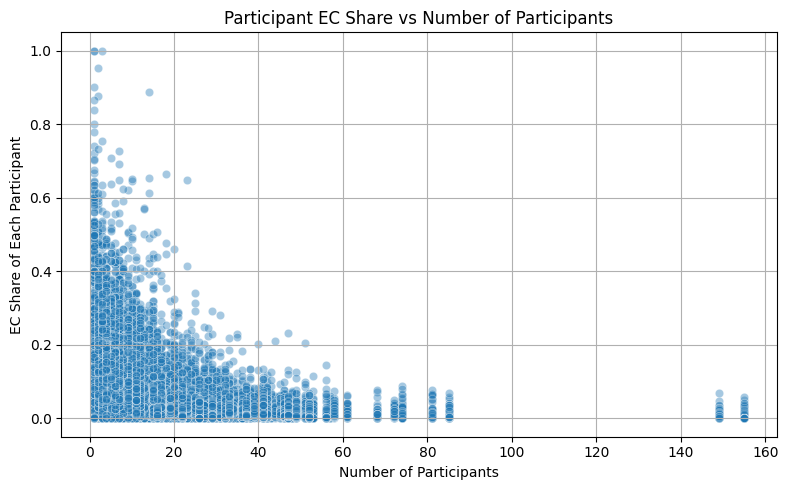

Spearman correlation: -0.657841903303002


In [77]:
# --- Number of participants per project ---
num_participants = (
    organizations[organizations["role"].str.lower() == "participant"]
    .groupby("projectID")
    .size()
    .rename("num_participants")
)

# --- EC share per participant org ---
participant_data = organizations[organizations["role"].str.lower() == "participant"].copy()
participant_data = participant_data.merge(total_ec, on="projectID", how="left")
participant_data["ec_share"] = participant_data["ecContribution"] / participant_data["total_ec"]

# --- Merge participant count ---
participant_data = participant_data.merge(num_participants, on="projectID", how="left")

# --- Plot ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=participant_data, x="num_participants", y="ec_share", alpha=0.4)
plt.title("Participant EC Share vs Number of Participants")
plt.xlabel("Number of Participants")
plt.ylabel("EC Share of Each Participant")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: correlation
print("Spearman correlation:", participant_data[["ec_share", "num_participants"]].corr(method="spearman").iloc[0,1])


In [78]:
# Total EC per project (all roles)
total_ec_per_project = organizations.groupby("projectID")["netEcContribution"].sum().rename("total_ec")

In [79]:
orgs_with_total = organizations.merge(total_ec_per_project, on="projectID", how="left")

# Calculate EC share for each org in each project
orgs_with_total["ec_share"] = orgs_with_total["netEcContribution"] / orgs_with_total["total_ec"]


In [80]:
# Keep only roles we're interested in
filtered_roles = orgs_with_total[orgs_with_total["role"].isin(["coordinator", "participant"])]

# Average EC share for each org by role
role_share_avg = (
    filtered_roles
    .groupby(["name", "role"])["ec_share"]
    .mean()
    .unstack(fill_value=0)
    .rename(columns={
        "coordinator": "avg_coord_share",
        "participant": "avg_part_share"
    })
)


In [81]:
role_share_avg["part_vs_coord_share_ratio"] = role_share_avg["avg_part_share"] / role_share_avg["avg_coord_share"].replace(0, np.nan)

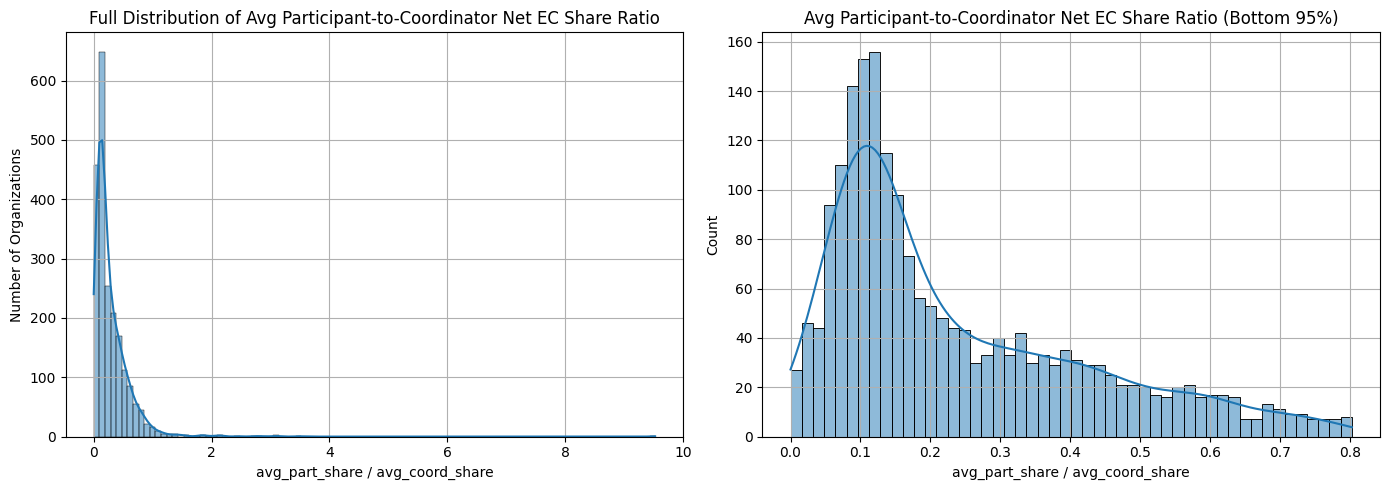

In [82]:
valid = (role_share_avg["avg_part_share"] > 0) & (role_share_avg["avg_coord_share"] > 0)
full_ratios = role_share_avg.loc[valid, "part_vs_coord_share_ratio"]

# Trim bottom 95% for second plot
upper_limit = full_ratios.quantile(0.95)
trimmed_ratios = full_ratios[full_ratios <= upper_limit]

# Side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

sns.histplot(full_ratios, bins=100, kde=True, ax=axes[0])
axes[0].set_title("Full Distribution of Avg Participant-to-Coordinator Net EC Share Ratio")
axes[0].set_xlabel("avg_part_share / avg_coord_share")
axes[0].set_ylabel("Number of Organizations")
axes[0].grid(True)

sns.histplot(trimmed_ratios, bins=50, kde=True, ax=axes[1])
axes[1].set_title("Avg Participant-to-Coordinator Net EC Share Ratio (Bottom 95%)")
axes[1].set_xlabel("avg_part_share / avg_coord_share")
axes[1].grid(True)

plt.tight_layout()
plt.show()

This shows that a same organisation will usually get different funding depending on their role participant vs coordinator <br> this confirms the logical intuition that the role of an organization influences the funding amount it receives

## 5.2 Topics

📊 Topic-Level Funding Analysis – Summary
Key Observations:

Topic Frequency:
- A small subset of topics appears in a large number of projects.
- Many topics are rare, appearing in only a handful of projects.

<br>Topic vs. Funding:
- Average EC contribution differs significantly between topics.
- Some topics are consistently associated with higher funding (e.g., civil engineering).
This suggests thematic area is a key predictor of funding levels.


<br>Number of Topics per Project:
- Most projects have 1–5 topics.
- No clear relationship is visible between number of topics and funding amount.
This indicates that breadth of topic coverage is not a strong funding driver.


<br>Topic Co-Occurrence (Correlation):
- Very low correlation between topics in co-occurrence matrices.
- Suggests topics are generally distinct and not bundled, so models shouldn't assume clusters.

In [170]:
projects_enriched

,id,acronym,title,topics,objective,startDate,endDate,ecSignatureDate,totalCost,ecMaxContribution,...,participant_PRC,participant_PUB,participant_REC,org_sum_ecContribution,org_sum_netEcContribution,org_sum_totalCost,final_categories,final_topics,num_categories,num_topics
0,101116741,DOE,Digitizing Other Economies: A Comparative Appr...,ERC-2023-STG,"How do longstanding, primarily non-industrial,...",2024-02-01,2029-01-31,2023-12-15,1499998.0,1499998.0,...,0,0,0,1499998.0,1499998.0,1499998.0,[Law and political sciences],[political sciences],1,1
1,101163161,IRASTRO,MOLECULAR QUANTUM DYNAMICS IN LOW TEMPERATURE ...,ERC-2024-SyG,The James Webb Space Telescope (JWST) has ushe...,2025-08-01,2031-07-31,2025-02-20,12085363.0,12085363.0,...,0,0,0,12085363.0,12085363.0,12085363.0,"[mathematics & physical sciences, Environmenta...","[physical sciences, agriculture, forestry, and...",3,3
2,101160499,In-phase,Multiscale modelling of aberrant phase transit...,ERC-2024-STG,The spatiotemporal organization of the cell ma...,2025-06-01,2030-05-31,2025-02-19,1489128.0,1489128.0,...,0,0,0,1489128.0,1489128.0,1489128.0,[Biological and medical science],[biological sciences],1,1
3,101166905,mw-atlas,The first comprehensive Atlas of the Milky Way,ERC-2024-SyG,The Milky Way is the cosmic environment in whi...,2025-05-01,2031-04-30,2025-02-20,9957560.0,9957560.0,...,0,0,1,9957560.0,9957560.0,9957560.0,"[mathematics & physical sciences, Environmenta...","[physical sciences, earth and related environm...",2,2
4,101162875,MAtCHLESS,Untapping multiparametric 2D luminescence sens...,ERC-2024-STG,Cellular organisms are complex machines whose ...,2025-03-01,2030-02-28,2025-02-18,1500000.0,1500000.0,...,0,0,0,1500000.0,1500000.0,1500000.0,"[Engineering and technology, Biological and me...","[clinical medicine, physical sciences, biologi...",3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14738,101114220,ModelMe,Deployment of ModelMe Innovation,HORIZON-EIE-2022-SCALEUP-02-02,The primary objective of the work performed wi...,2023-07-01,2024-01-31,2023-06-01,0.0,75000.0,...,0,0,0,75000.0,75000.0,0.0,NaN,NaN,0,0
14739,101114193,Cogo,Cogo - all ride in one app. Cogo gathers elect...,HORIZON-EIE-2022-SCALEUP-02-02,Bibi Blomqvist co-founder and COO of Cogo ApS....,2023-07-01,2024-06-30,2023-06-19,0.0,75000.0,...,0,0,0,75000.0,75000.0,0.0,NaN,NaN,0,0
14740,101114191,HORIZER,HORIZER,HORIZON-EIE-2022-SCALEUP-02-02,"In Women TechEU, HORIZER aims, over the next 9...",2023-07-01,2024-03-31,2023-06-05,0.0,75000.0,...,0,0,0,75000.0,75000.0,0.0,NaN,NaN,0,0
14741,101114035,iComplai,AI-powered early warning and surveillance syst...,HORIZON-EIE-2022-SCALEUP-02-02,A product recall is the process of retrieving ...,2023-07-01,2024-03-31,2023-06-01,0.0,75000.0,...,0,0,0,75000.0,75000.0,0.0,NaN,NaN,0,0


In [172]:
# Flatten the list of topic lists into a single list
flat_topic_list = [topic for topics in projects_enriched["final_topics"] if isinstance(topics, list) for topic in topics]

# Count occurrences
topic_counts = pd.Series(Counter(flat_topic_list)).sort_values(ascending=False)

# Optional: shorten long names for plotting
max_label_length = 30
short_labels = topic_counts.index.to_series().apply(lambda x: x if len(x) <= max_label_length else x[:max_label_length] + "…")

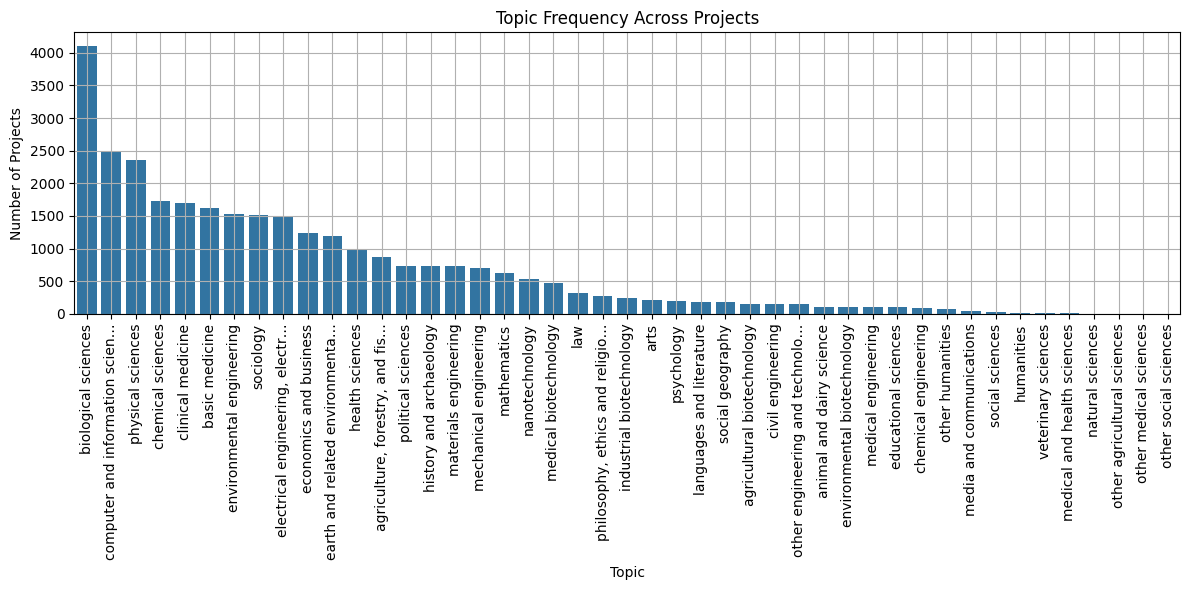

In [173]:
plt.figure(figsize=(12, 6))
sns.barplot(x=short_labels, y=topic_counts.values)
plt.title("Topic Frequency Across Projects")
plt.xlabel("Topic")
plt.ylabel("Number of Projects")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


In [192]:
# 1. Explode topics into one row per topic
projects_exploded = projects_enriched[["id", "ecMaxContribution", "totalCost", "final_topics"]].explode("final_topics")

# Convert to numeric if needed
projects_exploded["ecMaxContribution"] = pd.to_numeric(projects_exploded["ecMaxContribution"], errors="coerce")
projects_exploded["totalCost"] = pd.to_numeric(projects_exploded["totalCost"], errors="coerce")

# 2. Compute EU funding share per project row
projects_exploded["euFundingShare"] = projects_exploded["ecMaxContribution"] / projects_exploded["totalCost"]

# 3. Group by topic and compute stats
topic_funding_stats = (
    projects_exploded.groupby("final_topics")
    .agg(
        mean_ec=("ecMaxContribution", "mean"),
        median_ec=("ecMaxContribution", "median"),
        count=("ecMaxContribution", "count"),
        mean_share=("euFundingShare", "mean")
    )
    .sort_values("mean_ec", ascending=False)
)

# 4. Shorten topic names for plotting
topic_funding_stats = topic_funding_stats.reset_index()
topic_funding_stats["short_topic"] = topic_funding_stats["final_topics"].apply(
    lambda x: x[:40] + "…" if isinstance(x, str) and len(x) > 40 else x
)

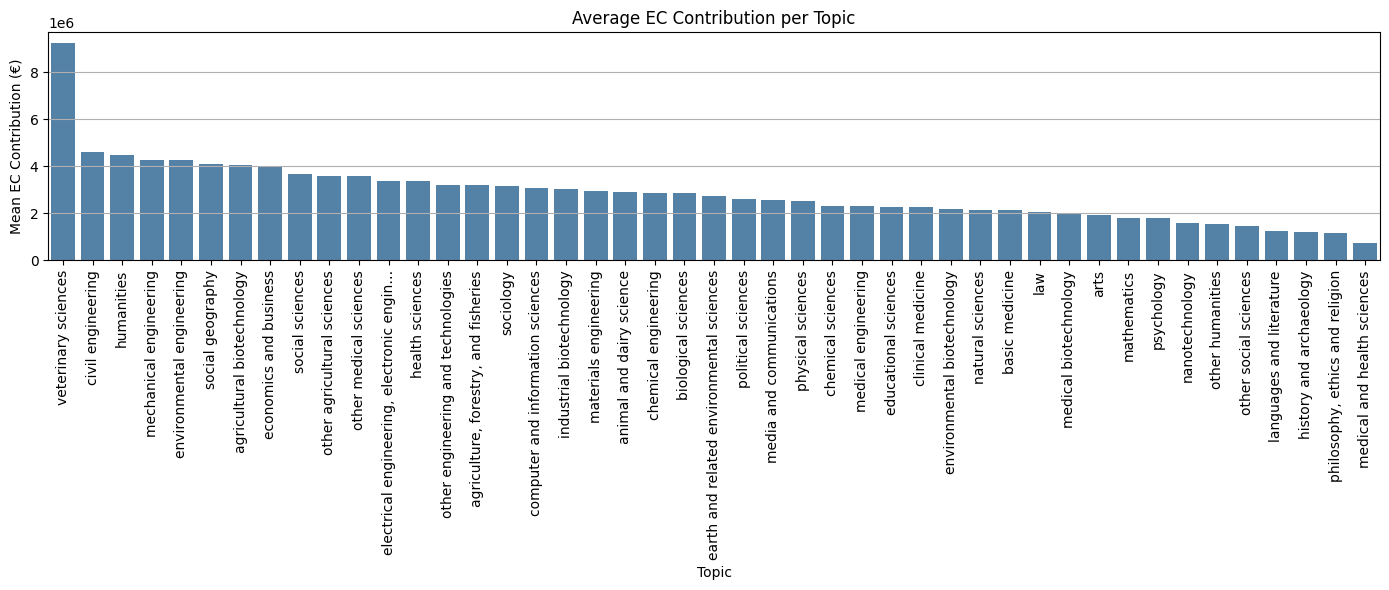

In [178]:
# 4. Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=topic_funding_stats,
    x="short_topic",
    y="mean",
    color="steelblue"
)
plt.title("Average EC Contribution per Topic")
plt.xlabel("Topic")
plt.ylabel("Mean EC Contribution (€)")
plt.xticks(rotation=90)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()


In [195]:
projects_exploded

,id,ecMaxContribution,totalCost,final_topics,euFundingShare
0,101116741,1499998.0,1499998.0,political sciences,1.0
1,101163161,12085363.0,12085363.0,physical sciences,1.0
1,101163161,12085363.0,12085363.0,"agriculture, forestry, and fisheries",1.0
1,101163161,12085363.0,12085363.0,law,1.0
2,101160499,1489128.0,1489128.0,biological sciences,1.0
...,...,...,...,...,...
14738,101114220,75000.0,0.0,NaN,inf
14739,101114193,75000.0,0.0,NaN,inf
14740,101114191,75000.0,0.0,NaN,inf
14741,101114035,75000.0,0.0,NaN,inf


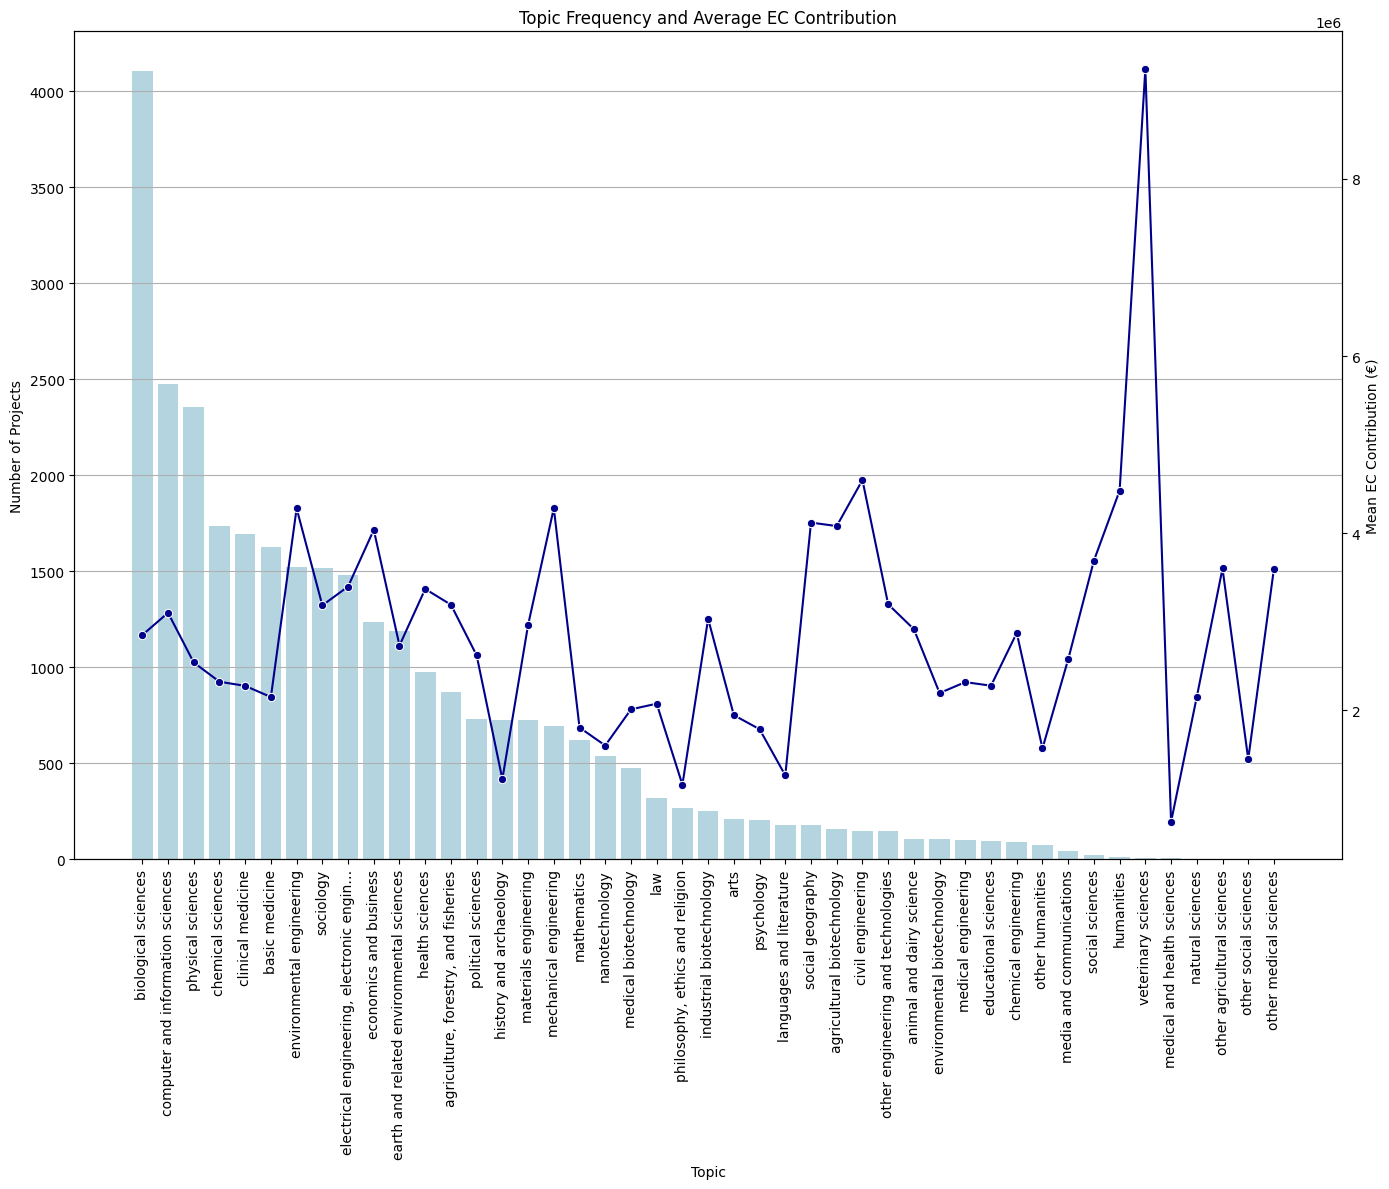

In [188]:
# Ensure both DataFrames are aligned and have matching short labels
topic_funding_stats["count"] = topic_funding_stats["count"].astype(int)
topic_funding_stats = topic_funding_stats.sort_values("count", ascending=False)

# Use same short_topic order for both axes
x = topic_funding_stats["short_topic"]
counts = topic_funding_stats["count"]
means = topic_funding_stats["mean"]

# Plot dual-axis chart
fig, ax1 = plt.subplots(figsize=(14,12))

# Bar plot for topic frequency
sns.barplot(x=x, y=counts, ax=ax1, color="lightblue")
ax1.set_ylabel("Number of Projects")
ax1.set_xlabel("Topic")
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Topic Frequency and Average EC Contribution")

# Add second Y-axis for mean EC contribution
ax2 = ax1.twinx()
sns.lineplot(x=x, y=means, ax=ax2, color="darkblue", marker="o")
ax2.set_ylabel("Mean EC Contribution (€)")

# Grid and layout
ax1.grid(True, axis="y")
plt.tight_layout()
plt.show()


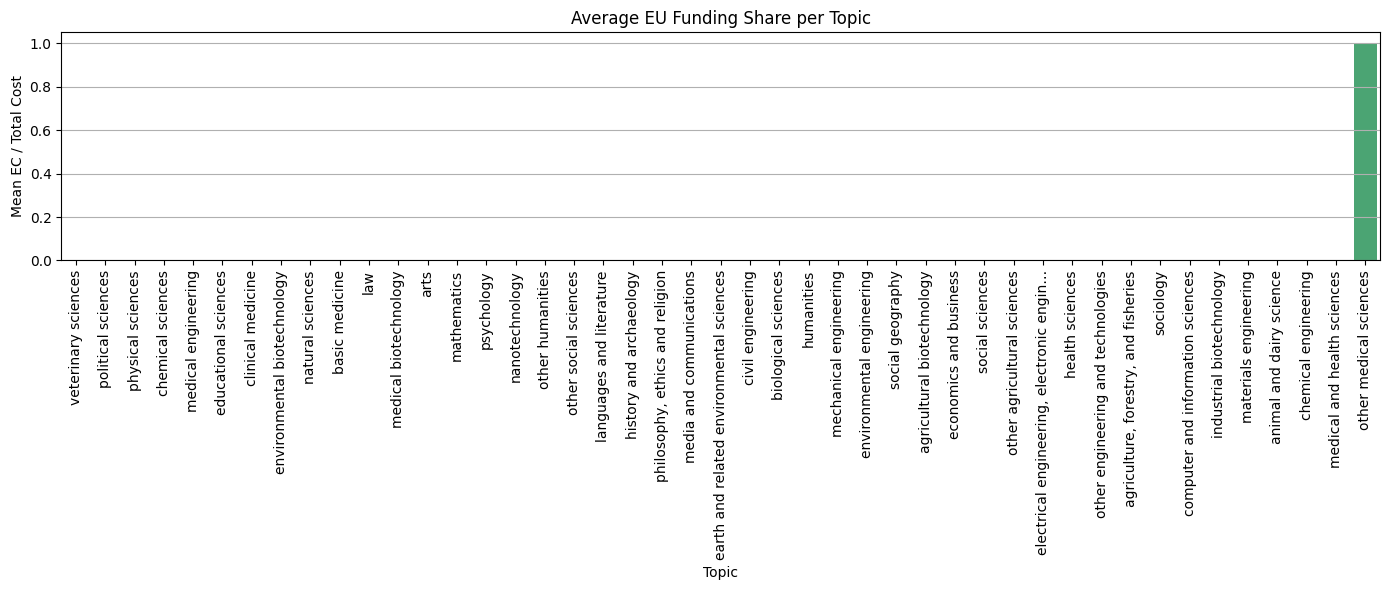

In [193]:
plt.figure(figsize=(14, 6))
sns.barplot(
    data=topic_funding_stats.sort_values("mean_share", ascending=False),
    x="short_topic",
    y="mean_share",
    color="mediumseagreen"
)
plt.title("Average EU Funding Share per Topic")
plt.xlabel("Topic")
plt.ylabel("Mean EC / Total Cost")
plt.xticks(rotation=90)
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()


The above plots show that some topics are much more frequent and that the funding amount depends on the funding topic

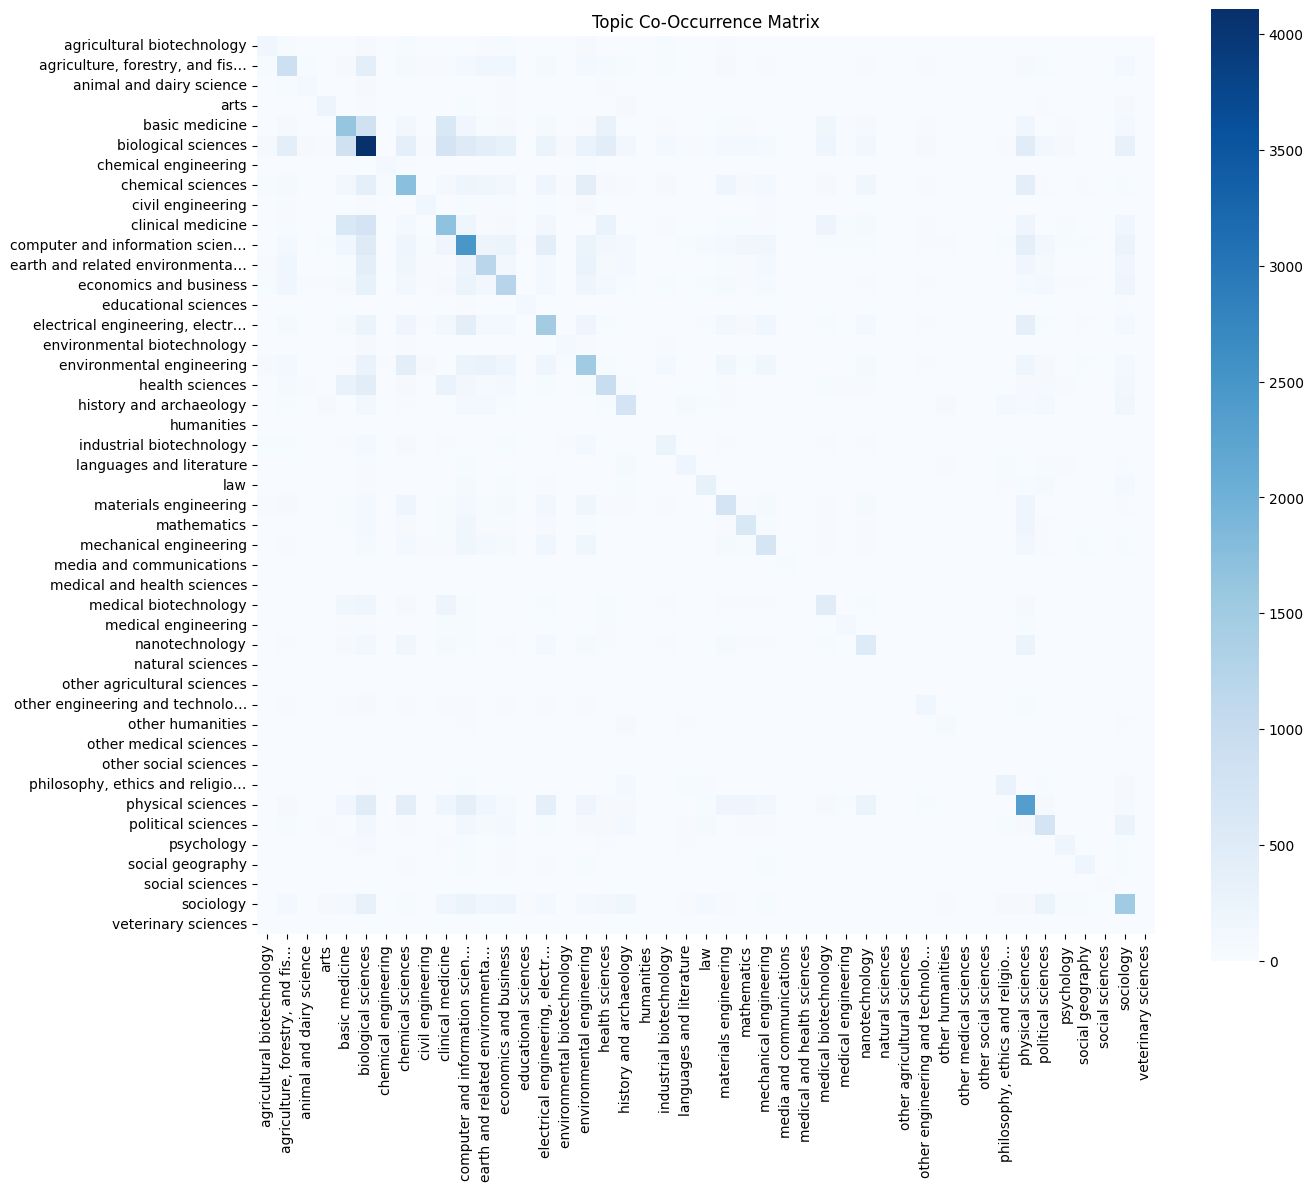

In [180]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
topic_matrix = pd.DataFrame(
    mlb.fit_transform(projects_enriched["final_topics"].dropna()),
    columns=mlb.classes_,
    index=projects_enriched["id"][projects_enriched["final_topics"].notna()]
)

# Compute co-occurrence matrix (symmetric)
topic_corr = topic_matrix.T @ topic_matrix  # raw co-occurrence counts

max_label_length = 30
short_labels = [t[:max_label_length] + "…" if len(t) > max_label_length else t for t in topic_corr.columns]

plt.figure(figsize=(14, 12))
sns.heatmap(topic_corr, cmap="Blues", square=True, xticklabels=short_labels, yticklabels=short_labels)
plt.title("Topic Co-Occurrence Matrix")
plt.tight_layout()
plt.show()

There doesnt seem to be a very notable correlation between certain topics

In [183]:
topics_per_project

,final_categories,final_topics
projectID,,
101039048,"[mathematics & physical sciences, chemical sci...","[physical sciences, chemical sciences]"
101039060,"[computer and information sciences, Environmen...","[computer and information sciences, earth and ..."
101039066,"[Biological and medical science, Environmental...","[biological sciences, agriculture, forestry, a..."
101039090,"[computer and information sciences, psychology...","[computer and information sciences, educationa..."
101039098,[mathematics & physical sciences],[physical sciences]
...,...,...
190198819,"[Engineering and technology, Environmental and...","[environmental biotechnology, environmental en..."
190199097,"[Engineering and technology, chemical sciences]","[mechanical engineering, chemical sciences]"
190199127,[economics and business],[economics and business]


In [184]:
# Convert to DataFrame if needed
topic_counts_df = topics_per_project['final_topics'].apply(lambda x: len(x) if isinstance(x, list) else 0).rename("num_topics").reset_index()

# Merge with project funding
topic_funding = projects[["id", "ecMaxContribution"]].rename(columns={"id": "projectID"})
topic_funding = topic_funding.merge(topic_counts_df, on="projectID", how="left")

# Ensure ecMaxContribution is numeric
topic_funding["ecMaxContribution"] = pd.to_numeric(topic_funding["ecMaxContribution"], errors="coerce")

# Compute stats
topic_group_stats = topic_funding.groupby("num_topics")["ecMaxContribution"].agg(["mean", "median", "count"]).reset_index()
topic_group_stats["num_topics"] = topic_group_stats["num_topics"].astype(int)
topic_group_stats = topic_group_stats.sort_values("num_topics")
topic_group_stats["q25"] = topic_funding.groupby("num_topics")["ecMaxContribution"].quantile(0.25).values
topic_group_stats["q75"] = topic_funding.groupby("num_topics")["ecMaxContribution"].quantile(0.75).values


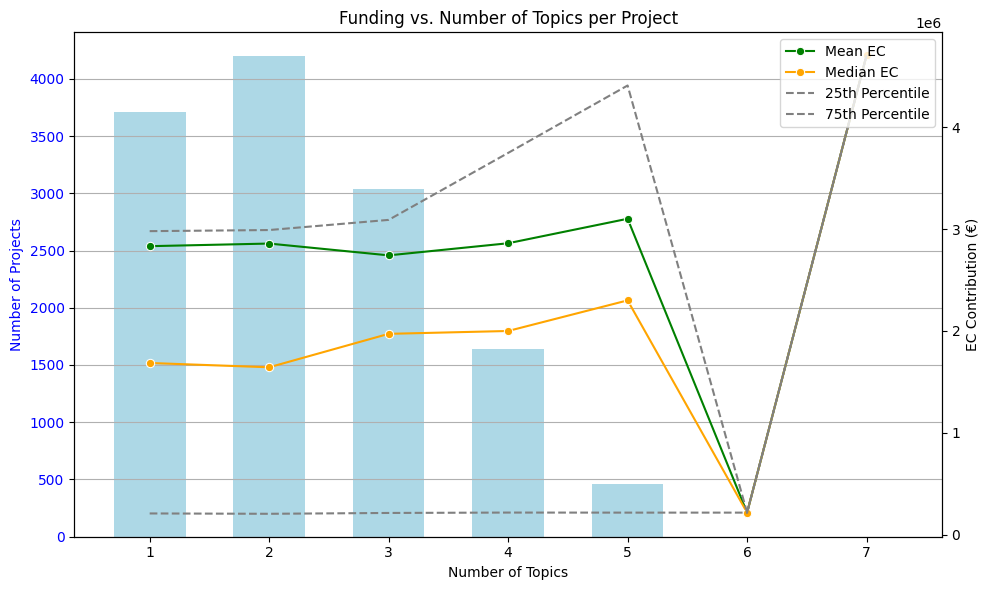

In [185]:
# --- Dual-axis plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

# Use raw matplotlib for barplot to avoid seaborn offset
ax1.bar(
    topic_group_stats["num_topics"],
    topic_group_stats["count"],
    color="lightblue",
    width=0.6,
    label="Number of Projects"
)
ax1.set_ylabel("Number of Projects", color="blue")
ax1.set_xlabel("Number of Topics")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True, axis='y')

# Line plot on right axis (funding stats)
ax2 = ax1.twinx()
sns.lineplot(
    x="num_topics", y="mean", data=topic_group_stats,
    marker="o", color="green", label="Mean EC", ax=ax2
)
sns.lineplot(
    x="num_topics", y="median", data=topic_group_stats,
    marker="o", color="orange", label="Median EC", ax=ax2
)
sns.lineplot(
    x="num_topics", y="q25", data=topic_group_stats,
    linestyle="--", color="gray", label="25th Percentile", ax=ax2
)
sns.lineplot(
    x="num_topics", y="q75", data=topic_group_stats,
    linestyle="--", color="gray", label="75th Percentile", ax=ax2
)

ax2.set_ylabel("EC Contribution (€)", color="black")
ax2.tick_params(axis='y', labelcolor="black")

# Align x-ticks
ax1.set_xticks(topic_group_stats["num_topics"])
ax2.set_xlim(ax1.get_xlim())

# Add legend for line plots
ax2.legend(loc="upper right")

plt.title("Funding vs. Number of Topics per Project")
plt.tight_layout()
plt.show()


There is no big difference is occurence of projects per number of topics <br> the number of topics also doesnt seem to impact the funding amount

## 5.3 Other

### 🧭 Funding Scheme & Legal Basis – Observations

#### Funding Scheme
- A few schemes dominate the dataset, notably `HORIZON-TMA-MSCA-PF-EF`, `HORIZON-ERC`, and `HORIZON-RIA`.
- These frequent schemes tend to have more stable average EC contributions.
- Some less common schemes (e.g. `HORIZON-JU-IA`, `HORIZON-ERC-SYG`) show very high average EC, but they occur in too few projects to draw reliable conclusions.
- This imbalance suggests the **scheme influences funding**, but also reflects predefined EU program structures.

#### Legal Basis
- The most frequent legal bases (`HORIZON.1.2`, `HORIZON.1.1`) are associated with moderate EC amounts.
- Some mid-frequency legal bases (e.g. `HORIZON.2.5`, `HORIZON.2.4`) have higher average funding.
- A few legal bases with **very small counts** (e.g. `HORIZON.3.3`, `EURATOM2027`) appear to receive exceptionally high EC, but again, their small sample size makes these averages less reliable.
- **Legal basis appears correlated with EC**, though likely as a proxy for broader project type or thematic priority.


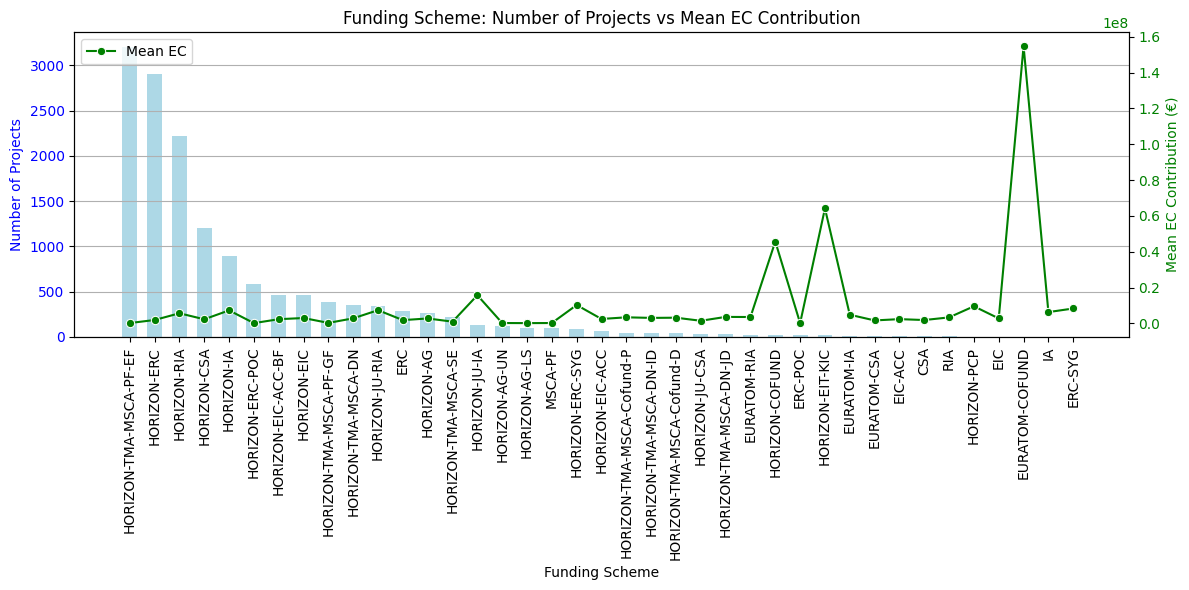

In [196]:
# Compute stats
scheme_stats = projects_enriched.groupby("fundingScheme")["ecMaxContribution"].agg(["mean", "count"]).sort_values("count", ascending=False)
scheme_stats = scheme_stats.reset_index()

# --- Dual-axis plot ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot (number of projects)
ax1.bar(
    scheme_stats["fundingScheme"],
    scheme_stats["count"],
    color="lightblue",
    width=0.6
)
ax1.set_ylabel("Number of Projects", color="blue")
ax1.set_xlabel("Funding Scheme")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xticks(range(len(scheme_stats["fundingScheme"])))
ax1.set_xticklabels(scheme_stats["fundingScheme"], rotation=90)
ax1.grid(True, axis="y")

# Line plot (mean EC)
ax2 = ax1.twinx()
sns.lineplot(
    data=scheme_stats,
    x=range(len(scheme_stats["fundingScheme"])),
    y="mean",
    marker="o",
    color="green",
    label="Mean EC",
    ax=ax2
)
ax2.set_ylabel("Mean EC Contribution (€)", color="green")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_xlim(ax1.get_xlim())

plt.title("Funding Scheme: Number of Projects vs Mean EC Contribution")

plt.tight_layout()
plt.show()

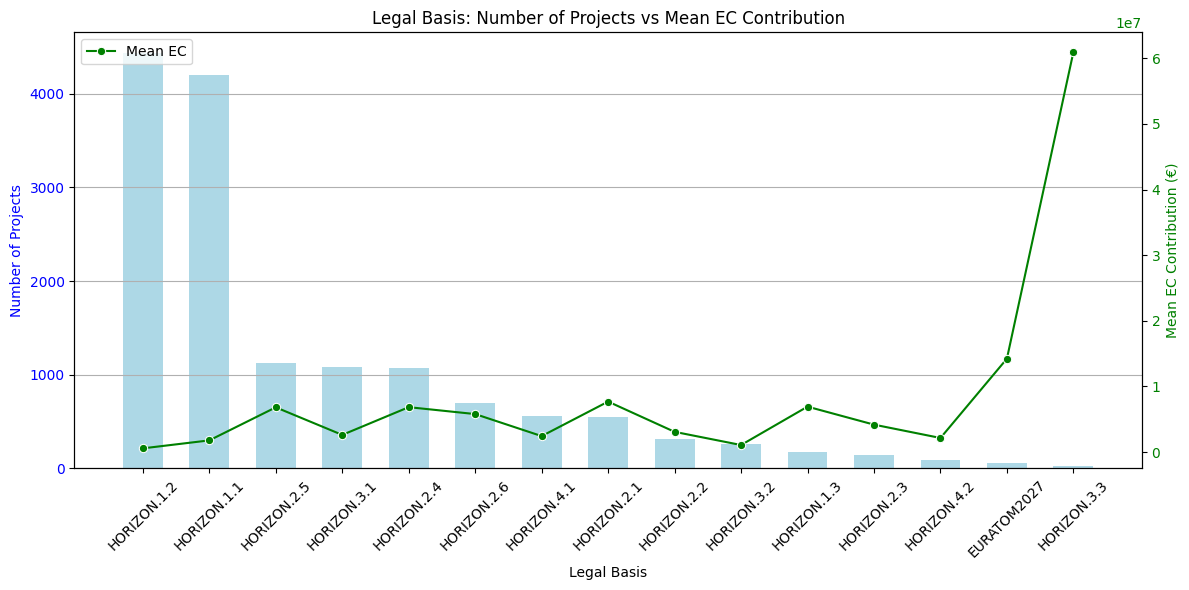

In [197]:
# Compute stats per legal basis
legal_stats = projects_enriched.groupby("legalBasis")["ecMaxContribution"].agg(["mean", "count"]).sort_values("count", ascending=False)
legal_stats = legal_stats.reset_index()

# --- Dual-axis plot ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot (number of projects)
ax1.bar(
    legal_stats["legalBasis"],
    legal_stats["count"],
    color="lightblue",
    width=0.6
)
ax1.set_ylabel("Number of Projects", color="blue")
ax1.set_xlabel("Legal Basis")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.set_xticks(range(len(legal_stats["legalBasis"])))
ax1.set_xticklabels(legal_stats["legalBasis"], rotation=45)
ax1.grid(True, axis="y")

# Line plot (mean EC)
ax2 = ax1.twinx()
sns.lineplot(
    data=legal_stats,
    x=range(len(legal_stats["legalBasis"])),
    y="mean",
    marker="o",
    color="green",
    label="Mean EC",
    ax=ax2
)
ax2.set_ylabel("Mean EC Contribution (€)", color="green")
ax2.tick_params(axis='y', labelcolor="green")
ax2.set_xlim(ax1.get_xlim())

plt.title("Legal Basis: Number of Projects vs Mean EC Contribution")
plt.tight_layout()
plt.show()

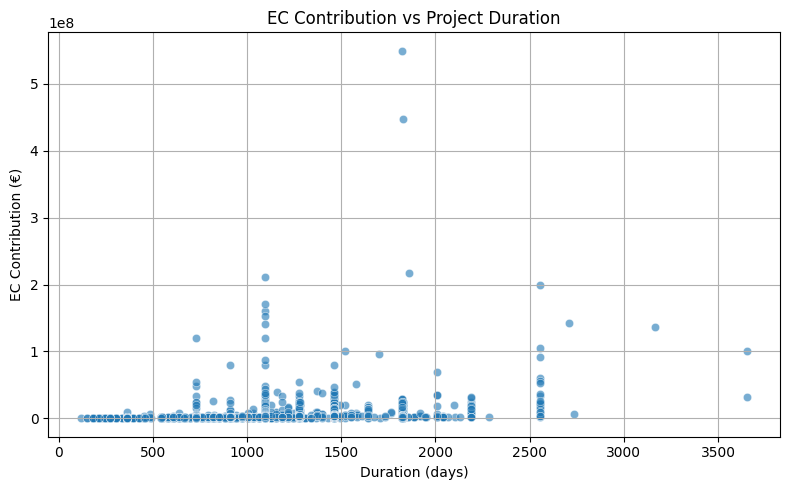

In [198]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=projects_enriched, x="duration_days", y="ecMaxContribution", alpha=0.6)
plt.title("EC Contribution vs Project Duration")
plt.xlabel("Duration (days)")
plt.ylabel("EC Contribution (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

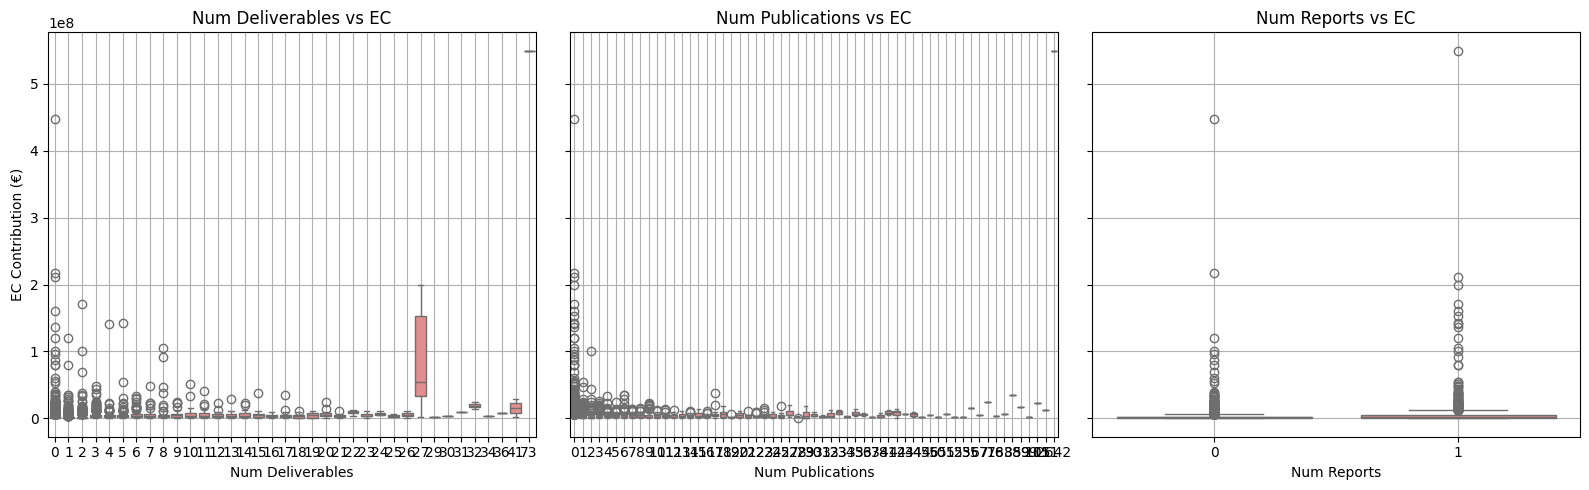

In [199]:
output_vars = ["num_deliverables", "num_publications", "num_reports"]

fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)

for i, var in enumerate(output_vars):
    sns.boxplot(
        data=projects_enriched,
        x=var,
        y="ecMaxContribution",
        ax=axes[i],
        color="lightcoral"
    )
    axes[i].set_title(f"{var.replace('_', ' ').title()} vs EC")
    axes[i].set_xlabel(var.replace('_', ' ').title())
    axes[i].set_ylabel("EC Contribution (€)")
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# 6. Model: Feature engineering


## 6.1 Topics

### 🧹 Topic Cleaning and Remapping

To improve model stability and interpretability, we cleaned and consolidated the original `esv_topics` into a refined `topic_clean` variable. Specifically:

- All `"other X"` categories were reassigned to their parent topic (e.g., `"other humanities"` → `"humanities"`).
- Rare topics (with very few projects) were reassigned to the most semantically appropriate broader topic.
- This reduced fragmentation without overly generalizing the topic space.

As a result, we now work with **36 cleaned topics**, each with enough occurrences to support reliable analysis and modeling.


In [200]:
topic_clean_map = {
    # Grouping all 'other X'
    "other humanities": "humanities",
    "other medical sciences": "health sciences",
    "other agricultural sciences": "agriculture, forestry, and fisheries",
    "other social sciences": "sociology",
    
    # Rare topic reassignments
    "animal and dairy science": "veterinary sciences",
    "medical and health sciences": "health sciences",
    "natural sciences": "physical sciences",
    "humanities": "history and archaeology",
    "social sciences": "sociology",
    "media and communications": "languages and literature",
}

In [202]:
projects_exploded["topic_clean"] = projects_exploded["final_topics"].replace(topic_clean_map)

In [203]:
topic_counts = projects_exploded["topic_clean"].value_counts()

In [204]:
projects_exploded

,id,ecMaxContribution,totalCost,final_topics,euFundingShare,topic_clean
0,101116741,1499998.0,1499998.0,political sciences,1.0,political sciences
1,101163161,12085363.0,12085363.0,physical sciences,1.0,physical sciences
1,101163161,12085363.0,12085363.0,"agriculture, forestry, and fisheries",1.0,"agriculture, forestry, and fisheries"
1,101163161,12085363.0,12085363.0,law,1.0,law
2,101160499,1489128.0,1489128.0,biological sciences,1.0,biological sciences
...,...,...,...,...,...,...
14738,101114220,75000.0,0.0,NaN,inf,NaN
14739,101114193,75000.0,0.0,NaN,inf,NaN
14740,101114191,75000.0,0.0,NaN,inf,NaN
14741,101114035,75000.0,0.0,NaN,inf,NaN


## 6.2 Organizations, activity types, countries

### Organization Grouping Strategy

To reduce the high cardinality of individual organizations (~27,000 unique names), we implemented a hierarchical grouping approach focused on `coordinator` and `participant` roles:

1. **High-frequency organizations** (appearing in ≥200 projects) are kept as their own group.
2. The remaining organizations are grouped by their **country and activity type** (e.g., `"Germany | HES"`), if this subgroup appears in at least 50 projects.
3. If neither condition is met, organizations are assigned to a more general group based on **activity type alone** (e.g., `"PRC"` or `"REC"`).

This results in a manageable number of **174 distinct `org_group` values**, balancing granularity and generalizability while preserving meaningful distinctions for downstream modeling.


In [205]:
# Count organization occurrences
org_roles = organizations[organizations["role"].isin(["coordinator", "participant"])]
org_counts = org_roles["name"].value_counts()

In [206]:
threshold1 = 400
threshold2 = 50

# Identify high-frequency orgs
major_orgs = org_counts[org_counts >= threshold1].index

# Precompute fallback group sizes
org_roles["group_country_type"] = org_roles["country"] + " | " + org_roles["activityType"]
group_counts = org_roles["group_country_type"].value_counts()

# Build mapping
def assign_group(row):
    name = row["name"]
    if name in major_orgs:
        return name
    combo = f"{row['country']} | {row['activityType']}"
    if group_counts.get(combo, 0) >= threshold2:
        return combo
    return row["activityType"]  # final fallback

organizations["org_group"] = organizations.apply(assign_group, axis=1)

In [207]:
organizations['org_group'].value_counts()

org_group
DE | HES    3403
IT | HES    3023
ES | PRC    2890
DE | PRC    2843
IT | PRC    2794
            ... 
TR | PUB      54
HR | PUB      53
SK | OTH      52
UA | REC      52
EE | PUB      51
Name: count, Length: 156, dtype: int64

## 6.3 Construct dataset

In [261]:
# STEP 1: Start from all organizations
org_proj = organizations.copy()

# Rename org-level financial fields to avoid name clashes
org_proj = org_proj.rename(columns={
    "ecContribution": "org_ecContribution",
    "netEcContribution": "org_netEcContribution",
    "totalCost": "org_totalCost"
})


In [262]:
# STEP 3: Merge project-level metadata
project_cols = [
    "id", "totalCost", "fundingScheme", "legalBasis", "ecMaxContribution",
    "duration_days","num_associatedPartners", "num_thirdParties"
]
org_proj = org_proj.merge(
    projects_enriched[project_cols],
    left_on="projectID",
    right_on="id",
    how="left"
).drop(columns=["id"])

In [263]:
# STEP 2: Compute total EC per project to calculate EC share
org_proj["org_share"] = org_proj["org_ecContribution"] / org_proj["ecMaxContribution"]

In [264]:
# STEP 5: Add cleaned topic list (from topic_clean)
topics_clean = (
    projects_exploded[["id", "topic_clean"]]
    .dropna()
    .groupby("id")["topic_clean"]
    .unique()
    .reset_index()
    .rename(columns={"id": "projectID", "topic_clean": "topic_clean_list"})
)
org_proj = org_proj.merge(topics_clean, on="projectID", how="left")

In [265]:
org_proj = org_proj.dropna(subset=["org_share"]).copy()

In [266]:
# One-hot encode role column (drop first if needed to avoid multicollinearity)
# df_model = pd.get_dummies(org_proj, columns=["role","SME", "fundingScheme", "legalBasis"], drop_first=True)
df_model = pd.get_dummies(org_proj, columns=["role"], drop_first=True)

df_model = df_model.drop(columns=['SME', 'fundingScheme', 'legalBasis'])

In [267]:
columns_to_drop = [
    "projectAcronym",    # identifier only
    "organisationID",    # not predictive
    "activityType",
    "name",              # high cardinality, already grouped
    "city",              # 
    "country",           # high cardinality, already grouped
    "contentUpdateDate", # not useful for modeling
    "endOfParticipation",# almost always False, likely not informative
    "rcn",               # internal ID
    "org_netEcContribution",  # included via org_share target
    "org_totalCost",       # 
    "ecMaxContribution",
    "totalCost",
    "num_associatedPartners",
    "num_thirdParties"  # same
]

df_model = df_model.drop(columns=columns_to_drop)


In [268]:
# Convert any bool-type columns to int
bool_cols = df_model.select_dtypes(include="bool").columns
df_model[bool_cols] = df_model[bool_cols].astype(int)


In [269]:
df_model

,projectID,org_ecContribution,project_total_ec,org_share,num_participants,deviation_ratio,org_group,duration_days,topic_clean_list,role_participant
0,101116741,1499998.00,1499998.0,1.000000,1,1.000000,NL | HES,1826.0,[political sciences],0
1,101163161,4246240.00,12085363.0,0.351354,3,1.054062,DK | HES,2190.0,"[physical sciences, agriculture, forestry, and...",1
2,101163161,1982813.00,12085363.0,0.164067,3,0.492202,DE | HES,2190.0,"[physical sciences, agriculture, forestry, and...",1
3,101163161,5856310.00,12085363.0,0.484579,3,1.453736,DE | REC,2190.0,"[physical sciences, agriculture, forestry, and...",0
4,101160499,1489128.00,1489128.0,1.000000,1,1.000000,ES | HES,1825.0,[biological sciences],0
...,...,...,...,...,...,...,...,...,...,...
79848,101114035,75000.00,75000.0,1.000000,1,1.000000,DE | PRC,274.0,NaN,0
79849,101121353,353541.25,1286125.0,0.274889,4,1.099555,PT | PRC,1338.0,NaN,0
79850,101121353,311172.50,1286125.0,0.241946,4,0.967783,DE | OTH,1338.0,NaN,1
79851,101121353,262848.75,1286125.0,0.204373,4,0.817491,DE | PUB,1338.0,NaN,1


## 6.5 Topic x org groups

### 📊 Constructing Fallback Groups for Organization × Topic Modeling

To estimate how funding varies across different combinations of organizations and research topics, we construct **organization–topic-based groups**. These groups help us encode funding behavior patterns for predictive modeling.

#### **What we do:**
1. We start by exploding the `org_proj` dataset so that each row corresponds to a single topic associated with an organization–project pair.
2. For each exploded row, we attempt to assign the most specific group possible, following a fallback hierarchy:
   - **Level 1:** `topic || organization name`
   - **Level 2:** `topic || country || activityType`
   - **Level 3:** `topic || activityType`
   - **Level 4:** `topic` only
3. We count how many samples fall into each candidate group, and we only keep a group level if it has **at least 10 examples**.
4. The final group assigned to each row is the **most specific level available with sufficient data**.

#### **Why we do this:**
- This strategy balances **specificity** (e.g. organization-level trends) with **robustness** (e.g. avoiding noisy estimates from rare combinations).
- These groups will be used later (during model training) to compute **typical funding shares** (like medians) in a **cross-validation-safe way**.
- We assign group IDs at the exploded level but use them in modeling on the original, per-organization rows. This ensures we retain **one row per org-project** while still benefiting from topic-level patterns.



In [246]:
# One-time mapping: explode to create (projectID, name, topic) → group
group_lookup = (
    org_proj.dropna(subset=["org_share"])
        .explode("topic_clean_list")
        .rename(columns={"topic_clean_list": "topic"})
        .assign(
            group_1=lambda df: df["topic"] + " || " + df["name"],
            group_2=lambda df: df["topic"] + " || " + df["country"] + " || " + df["activityType"],
            group_3=lambda df: df["topic"] + " || " + df["activityType"],
            group_4=lambda df: df["topic"]
        )
)

# Count group occurrences (same logic as before)
counts_1 = group_lookup["group_1"].value_counts()
counts_2 = group_lookup["group_2"].value_counts()
counts_3 = group_lookup["group_3"].value_counts()
counts_4 = group_lookup["group_4"].value_counts()

threshold = 10

# Assign fallback group (same function)
def choose_group(row):
    if counts_1.get(row["group_1"], 0) >= threshold:
        return row["group_1"]
    elif counts_2.get(row["group_2"], 0) >= threshold:
        return row["group_2"]
    elif counts_3.get(row["group_3"], 0) >= threshold:
        return row["group_3"]
    else:
        return row["group_4"]

group_lookup["group"] = group_lookup.apply(choose_group, axis=1)

# Final lookup table for later: projectID + org → [groups]
project_org_group_map = (
    group_lookup.groupby(["projectID", "name"])["group"].agg(list).reset_index()
)

In [247]:
project_org_group_map

,projectID,name,group
0,101039048,FUNDACION DONOSTIA INTERNATIONAL PHYSICS CENTER,"[physical sciences || ES || REC, chemical scie..."
1,101039060,ARANZADI ZIENTZI ELKARTEA,[computer and information sciences || ES || RE...
2,101039060,UNIVERSIDAD DEL PAIS VASCO/ EUSKAL HERRIKO UNI...,[computer and information sciences || UNIVERSI...
3,101039060,UNIVERSITAT DE BARCELONA,[computer and information sciences || UNIVERSI...
4,101039066,UNIWERSYTET IM. ADAMA MICKIEWICZA WPOZNANIU,"[biological sciences || PL || HES, agriculture..."
...,...,...,...
76953,190198819,FIMUSKRAFT,"[environmental biotechnology || FI || PRC, env..."
76954,190199097,SIMPLICITY WORKS EUROPE SL,"[mechanical engineering || ES || PRC, chemical..."
76955,190199127,ABZU APS,[economics and business || DK || PRC]
76956,190199469,NANORDICA MEDICAL OU,"[clinical medicine || EE || PRC, nanotechnolog..."


# 7. Machine Learning

In [260]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor


## 7.1 Target encoding

In [248]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class DualGroupTargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, project_col, project_group_map):
        """
        Parameters:
        - project_col: name of the project ID column
        - project_group_map: dict mapping projectID → list of groups
        """
        self.project_col = project_col
        self.project_group_map = project_group_map

    def fit(self, X, y):
        """
        y should be a DataFrame with two columns: 'ec_share' and 'ec_contribution'
        """
        df = X.copy()
        df["_ec_share"] = y["ec_share"].values
        df["_ec_contribution"] = y["ec_contribution"].values

        # Fallbacks
        self.global_share_ = df["_ec_share"].median()
        self.global_contribution_ = df["_ec_contribution"].median()

        # Expand project → group list
        df["groups"] = df[self.project_col].apply(lambda pid: self.project_group_map.get(pid, []))
        df_exploded = df.explode("groups").dropna(subset=["groups"])

        # Compute medians per group
        self.share_map_ = df_exploded.groupby("groups")["_ec_share"].median().to_dict()
        self.contribution_map_ = df_exploded.groupby("groups")["_ec_contribution"].median().to_dict()
        return self

    def transform(self, X):
        def encode_row(row):
            group_list = self.project_group_map.get(row[self.project_col], [])
            shares = [self.share_map_.get(g) for g in group_list if g in self.share_map_]
            contributions = [self.contribution_map_.get(g) for g in group_list if g in self.contribution_map_]

            share_val = np.mean(shares) if shares else self.global_share_
            contrib_val = np.mean(contributions) if contributions else self.global_contribution_
            return pd.Series([share_val, contrib_val])

        encoded = X.apply(encode_row, axis=1)
        return encoded.values  # shape (n_rows, 2)

In [287]:
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnDropper(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.columns)

## 7.2 Models

In [259]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV()

In [250]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [251]:
from sklearn.ensemble import HistGradientBoostingRegressor
gb_model = HistGradientBoostingRegressor(random_state=42)

In [252]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(cv=5)

## 7.3 Data

In [286]:
# --- Configuration ---


# Choose one of: "org_ec_share", "org_ec", "project_ec"
target = "project_total_ec"

# If True: filter to coordinator rows only (for project-level target)
only_coordinators = (target == "project_total_ec")


# --- Filter data if needed ---
df = df_model.copy()
if only_coordinators:
    df = df[df["role_participant"] == 0]

# --- Drop target column from input features ---
X = df
X = df.drop(columns=[target])
# --- Select y_target (the actual prediction target) ---
y_target = df[target]




In [288]:
X

,projectID,org_ecContribution,org_share,num_participants,deviation_ratio,org_group,duration_days,topic_clean_list,role_participant
0,101116741,1499998.00,1.000000,1,1.000000,NL | HES,1826.0,[political sciences],0
3,101163161,5856310.00,0.484579,3,1.453736,DE | REC,2190.0,"[physical sciences, agriculture, forestry, and...",0
4,101160499,1489128.00,1.000000,1,1.000000,ES | HES,1825.0,[biological sciences],0
7,101166905,3820000.00,0.383628,3,1.150884,DE | REC,2190.0,"[physical sciences, earth and related environm...",0
8,101162875,1450000.00,0.966667,2,1.933333,IT | HES,1825.0,"[clinical medicine, physical sciences, biologi...",0
...,...,...,...,...,...,...,...,...,...
79845,101114220,75000.00,1.000000,1,1.000000,DE | PRC,214.0,NaN,0
79846,101114193,75000.00,1.000000,1,1.000000,DK | PRC,365.0,NaN,0
79847,101114191,75000.00,1.000000,1,1.000000,DE | PRC,274.0,NaN,0
79848,101114035,75000.00,1.000000,1,1.000000,DE | PRC,274.0,NaN,0


## 7.2 Pipeline

In [ ]:
# --- Prepare encoder ---
dual_encoder = DualGroupTargetEncoder(
    project_col="projectID",
    project_group_map=project_org_group_map
)

In [ ]:
# --- Example pipeline setup with RidgeCV (extendable to other models) ---
columns_to_drop = ['deviation_ratio', 'org_group', 'duration_days', 'topic_clean_list']
pipeline = Pipeline([
    ("drop_cols", ColumnDropper(columns_to_drop)),
    ("dual_te", dual_encoder),
    ("regressor", reg)
])



In [ ]:
# --- Run cross-validation ---
scores = cross_validate(
    pipeline,
    X,
    y_target,
    scoring={
        "MAE": make_scorer(mean_absolute_error),
        "R2": make_scorer(r2_score)
    },
    cv=5,
    fit_params={"dual_te__y": y_encode}  # pass both encoded targets
)

In [ ]:
# --- Display results ---
print("MAE:", scores["test_MAE"].mean())
print("R2 :", scores["test_R2"].mean())


## 7. Conclusion and Insights

In [ ]:

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T.sort_values("MAE (test)")
print(results_df)